# Self Case Study-1: Talking Data User Demographics

## 1. Business Problem

### 1.1. Problem Overview

Nothing is more comforting than being greeted by your favorite drink just as you walk through the door of the corner café. While a thoughtful barista knows you take a macchiato every Wednesday morning at 8:15, it’s much more difficult in a digital space for your preferred brands to personalize your experience.

TalkingData, China’s largest third-party mobile data platform, understands that everyday choices and behaviors paint a picture of who we are and what we value. Currently, TalkingData is seeking to leverage behavioral data from more than 70% of the 500 million mobile devices active daily in China to help its clients better understand and interact with their audiences.

In this competition, Kagglers are challenged to build a model predicting users’ demographic characteristics based on their app usage, geolocation, and mobile device properties. Doing so will help millions of developers and brand advertisers around the world pursue data-driven marketing efforts which are relevant to their users and catered to their preferences.

**Source:**https://www.kaggle.com/c/talkingdata-mobile-user-demographics/overview

### 1.2. Real-world/Business objectives and constraints

* No low-latency requirement.
* Probability of a data-point belonging to each class is needed.

## 2. Machine Learning Problem Formulation

### 2.1. Data Overview

The Data is collected from TalkingData SDK integrated within mobile apps TalkingData serves under the service term between TalkingData and mobile app developers. 

**Source:** https://www.kaggle.com/c/talkingdata-mobile-user-demographics/data

1. **gender_age_train.csv, gender_age_test.csv** - the training and test set
     group: this is the target variable we are going to predict
2. **events.csv, app_events.csv** - when a user uses TalkingData SDK, the event gets logged in this data. Each event has an event id, location (lat/long), and the event corresponds to a list of apps in app_events.
    timestamp: when the user is using an app with TalkingData SDK
3. **app_labels.csv** - apps and their labels, the label_id's can be used to join with label_categories
4. **label_categories.csv** - apps' labels and their categories in text
5. **phone_brand_device_model.csv** - device ids, brand, and models
    phone_brand: note that the brands are in Chinese (translation courtesy of user fromandto) 
    
     * 三星 samsung

     * 天语 Ktouch

     * 海信 hisense

     *  联想 lenovo

     * 欧比 obi

     * 爱派尔 ipair

     * 努比亚 nubia

     * 优米 youmi

     * 朵唯 dowe

     * 黑米 heymi

     * 锤子 hammer

     * 酷比魔方 koobee

     * 美图 meitu

     * 尼比鲁 nibilu

     * 一加 oneplus

     * 优购 yougo

     * 诺基亚 nokia

     * 糖葫芦 candy

     * 中国移动 ccmc

     * 语信 yuxin

     * 基伍 kiwu

     * 青橙 greeno

     * 华硕 asus

     * 夏新 panosonic

     * 维图 weitu

     * 艾优尼 aiyouni

     * 摩托罗拉 moto

     * 乡米 xiangmi

     * 米奇 micky

     * 大可乐 bigcola

     * 沃普丰 wpf

     * 神舟 hasse

     * 摩乐 mole

     * 飞秒 fs

     * 米歌 mige

     * 富可视 fks

     * 德赛 desci

     * 梦米 mengmi

     * 乐视 lshi

     * 小杨树 smallt

     * 纽曼 newman

     * 邦华 banghua

     * E派 epai

     * 易派 epai

     * 普耐尔 pner

     * 欧新 ouxin

     * 西米 ximi

     * 海尔 haier

     * 波导 bodao

     * 糯米 nuomi

     * 唯米 weimi

     * 酷珀 kupo

     * 谷歌 google

     * 昂达 ada

     * 聆韵 lingyun

### 2.2 Mapping Real-World Problem to Machine-Learning Problem

#### 2.2.1. Type of ML Problem 

1. It is a Multi-Class Classification Problem.
2. The 12 classes to predict are:
   * F23-
   * F24-26
   * F27-28
   * F29-32
   * F33-42
   * F43+
   * M22- 
   * M23-26  
   * M27-28 
   * M29-31 
   * M32-38 
   * M39+


#### 2.2.2. Performance Metric

**Source:** https://www.kaggle.com/c/talkingdata-mobile-user-demographics/overview/evaluation

Multi-class Log-loss


#### 2.2.3. Machine Learing Objectives and Constraints

**Objective:** Predict the probability of each data-point belonging to each of the 12 classes.

**Constraints:**
* Class probabilities are needed.
* No Latency constraints.

## 3. Exploratory Data Analysis

In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import re
import time
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from scipy.sparse import hstack
from scipy.sparse import csr_matrix
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

**Gender-Age Train Data**

In [2]:
gender_age_train=pd.read_csv('gender_age_train.csv')

In [3]:
gender_age_train.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


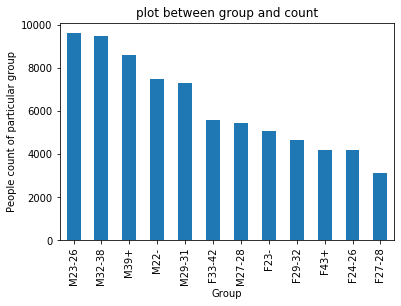

In [4]:
plt.title('plot between group and count')
plt.xlabel('Group')
plt.ylabel('People count of particular group')
gender_age_train['group'].value_counts().plot.bar()
plt.show()

**Observation**
1. It is not a Balanced Dataset
2. The Number of points for Male gender age groups is more than Female gender age groups

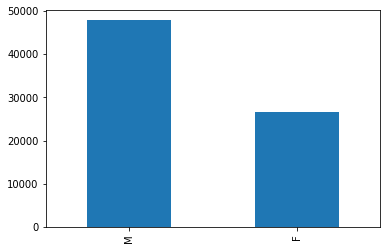

In [5]:
gender_age_train.gender.value_counts().plot(kind='bar')

From above plot we can say that Male device users are more in number compared to Female users

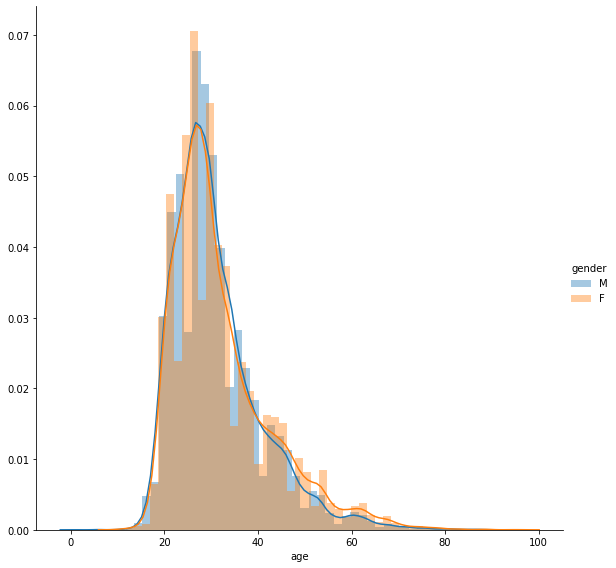

In [6]:
sns.FacetGrid(gender_age_train, hue="gender", size=8) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show()

**Observation:**
1. There is a overlap in the Number of Male and Female in the age group of 15 to 40
2. The Number of Female is slightly more than Male in the age group from 42 to 65

**Gender Age Test Data**

In [7]:
gender_age_test=pd.read_csv('gender_age_test.csv')

In [8]:
gender_age_test.columns.values

array(['device_id'], dtype=object)

In [9]:
print("Number of Values present in Test Data: ",gender_age_test.shape[0])

Number of Values present in Test Data:  112071


In [10]:
test_unique_devices=np.unique(gender_age_test['device_id'].values)
print("Number of Unique Device IDs in test :",len(test_unique_devices))

Number of Unique Device IDs in test : 112071


**Phone Brand and Device Model Data**

In [11]:
phone_data=pd.read_csv('phone_brand_device_model.csv')
print(phone_data.shape)
phone_data.head()


(187245, 3)


,device_id,phone_brand,device_model
0,-8890648629457979026,小米,红米
1,1277779817574759137,小米,MI 2
2,5137427614288105724,三星,Galaxy S4
3,3669464369358936369,SUGAR,时尚手机
4,-5019277647504317457,三星,Galaxy Note 2


I am translating Phone Brand and Device Model to english which are written in chinese

In [12]:
english_phone_brands_mapping = {
    "三星": "samsung",
    "天语": "Ktouch",
    "海信": "hisense",
    "联想": "lenovo",
    "欧比": "obi",
    "爱派尔": "ipair",
    "努比亚": "nubia",
    "优米": "youmi",
    "朵唯": "dowe",
    "黑米": "heymi",
    "锤子": "hammer",
    "酷比魔方": "koobee",
    "美图": "meitu",
    "尼比鲁": "nibilu",
    "一加": "oneplus",
    "优购": "yougo",
    "诺基亚": "nokia",
    "糖葫芦": "candy",
    "中国移动": "ccmc",
    "语信": "yuxin",
    "基伍": "kiwu",
    "青橙": "greeno",
    "华硕": "asus",
    "夏新": "panosonic",
    "维图": "weitu",
    "艾优尼": "aiyouni",
    "摩托罗拉": "moto",
    "乡米": "xiangmi",
    "米奇": "micky",
    "大可乐": "bigcola",
    "沃普丰": "wpf",
    "神舟": "hasse",
    "摩乐": "mole",
    "飞秒": "fs",
    "米歌": "mige",
    "富可视": "fks",
    "德赛": "desci",
    "梦米": "mengmi",
    "乐视": "lshi",
    "小杨树": "smallt",
    "纽曼": "newman",
    "邦华": "banghua",
    "E派": "epai",
    "易派": "epai",
    "普耐尔": "pner",
    "欧新": "ouxin",
    "西米": "ximi",
    "海尔": "haier",
    "波导": "bodao",
    "糯米": "nuomi",
    "唯米": "weimi",
    "酷珀": "kupo",
    "谷歌": "google",
    "昂达": "ada",
    "聆韵": "lingyun",
    "小米": "Xiaomi",
    "华为": "Huawei",
    "魅族": "Meizu",
    "中兴": "ZTE",
    "酷派": "Coolpad",
    "金立": "Gionee",
    "SUGAR": "SUGAR",
    "OPPO": "OPPO",
    "vivo": "vivo",
    "HTC": "HTC",
    "LG": "LG",
    "ZUK": "ZUK",
    "TCL": "TCL",
    "LOGO": "LOGO",
    "SUGAR": "SUGAR",
    "Lovme": "Lovme",
    "PPTV": "PPTV",
    "ZOYE": "ZOYE",
    "MIL": "MIL",
    "索尼" : "Sony",
    "欧博信" : "Opssom",
    "奇酷" : "Qiku",
    "酷比" : "CUBE",
    "康佳" : "Konka",
    "亿通" : "Yitong",
    "金星数码" : "JXD",
    "至尊宝" : "Monkey King",
    "百立丰" : "Hundred Li Feng",
    "贝尔丰" : "Bifer",
    "百加" : "Bacardi",
    "诺亚信" : "Noain",
    "广信" : "Kingsun",
    "世纪天元" : "Ctyon",
    "青葱" : "Cong",
    "果米" : "Taobao",
    "斐讯" : "Phicomm",
    "长虹" : "Changhong",
    "欧奇" : "Oukimobile",
    "先锋" : "XFPLAY",
    "台电" : "Teclast",
    "大Q" : "Daq",
    "蓝魔" : "Ramos",
    "奥克斯" : "AUX"
}

In [13]:
# # Below code will Translate the Chinese Terms in both columns to English
#english_phone_brands_mapping[x]--will fetch the value corresponds to key in dictionary
phone_data['phone_brand'] = phone_data['phone_brand'].apply(lambda x: english_phone_brands_mapping[x] if x in english_phone_brands_mapping else x)

In [14]:
print(phone_data.shape)
phone_data.head()

(187245, 3)


,device_id,phone_brand,device_model
0,-8890648629457979026,Xiaomi,红米
1,1277779817574759137,Xiaomi,MI 2
2,5137427614288105724,samsung,Galaxy S4
3,3669464369358936369,SUGAR,时尚手机
4,-5019277647504317457,samsung,Galaxy Note 2


Are there any duplicates in Phone Data?

In [15]:
phone_devices_unique=np.unique(phone_data['device_id'].values)#which will give unique devices from phone data
print("Number of unique phone devices: ",len(phone_devices_unique))
print("Total Number of devices in phone Data: ",phone_data.shape[0])
print("Number of Duplicate Devices: ",phone_data.shape[0]-len(phone_devices_unique))

Number of unique phone devices:  186716
Total Number of devices in phone Data:  187245
Number of Duplicate Devices:  529


I will remove the duplicate data from phone devices

In [16]:
# https://stackoverflow.com/questions/20944483/python-3-sort-a-dict-by-its-values
#Sorting dict by value in decending order and storing keys
brand_dict=dict(phone_data['phone_brand'].value_counts())
brand_keys = [k for k in sorted(brand_dict, key=brand_dict.get, reverse=True)]#This will sort the keys based on it's count in descending
#considering top 15 keys with highest values 
brand_top_keys=brand_keys[:15]
#Getting counts related to top 15 keys
brand_top_values=[brand_dict.get(k) for k in brand_top_keys]

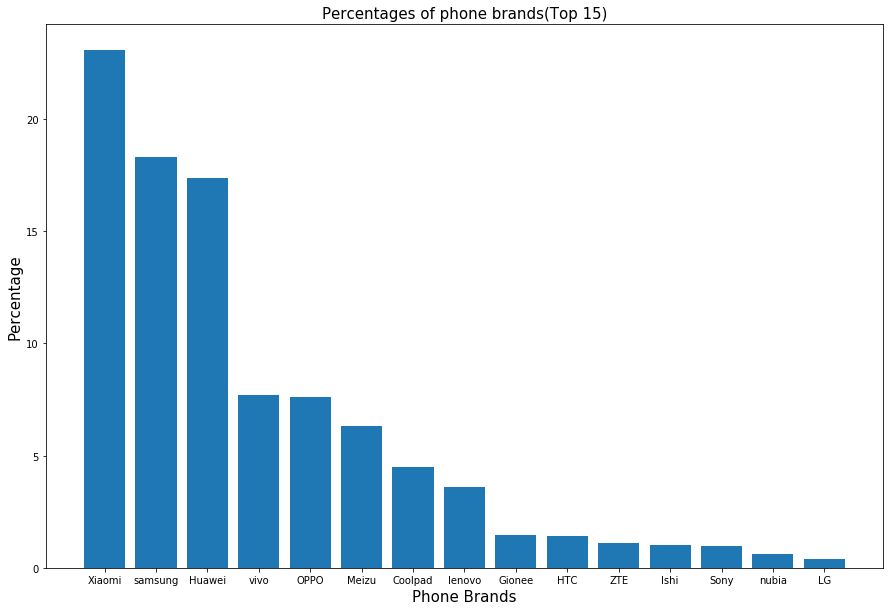

----------------------------------------------------------------------------------------------------
Brand:  Xiaomi  Percentage:  23.08  %
Brand:  samsung  Percentage:  18.31  %
Brand:  Huawei  Percentage:  17.39  %
Brand:  vivo  Percentage:  7.69  %
Brand:  OPPO  Percentage:  7.63  %
Brand:  Meizu  Percentage:  6.33  %
Brand:  Coolpad  Percentage:  4.49  %
Brand:  lenovo  Percentage:  3.61  %
Brand:  Gionee  Percentage:  1.48  %
Brand:  HTC  Percentage:  1.43  %
Brand:  ZTE  Percentage:  1.12  %
Brand:  lshi  Percentage:  1.03  %
Brand:  Sony  Percentage:  0.97  %
Brand:  nubia  Percentage:  0.61  %
Brand:  LG  Percentage:  0.41  %


In [17]:
plt.figure(figsize=(15,10))
indices=np.arange(len(brand_top_keys))#indices will be range from 0-14
counts=np.array(brand_top_values)#getting an array from counts
percent=(counts/phone_data.shape[0])*100 #to get perncetage of each brand of top 15
plt.bar(indices,percent)
plt.xlabel('Phone Brands',fontsize=15)
plt.ylabel('Percentage',fontsize=15)
plt.title('Percentages of phone brands(Top 15)',fontsize=15)
plt.xticks(indices,brand_top_keys)
plt.show()
print("-"*100)
#Below code will print percentages of top brands
for i in range(len(brand_top_keys)):
    print("Brand: ",brand_top_keys[i]," Percentage: ",np.round(percent[i],2)," %")

**Observation**
1. Most used brands are :Xiaomi, Samsung, Huawei (sum of 3 brands is nearly 58% of total market)
2. Remaining brands will contain 42% market 
3. So Xiaomi,Samsung,Huawei are leading mobile brands in the market

**Label Categories Data**

In [18]:
label_categories=pd.read_csv('label_categories.csv')

In [19]:
print("Shape of the label_categories :",label_categories.shape)
label_categories.head()

Shape of the label_categories : (930, 2)


,label_id,category
0,1,NaN
1,2,game-game type
2,3,game-Game themes
3,4,game-Art Style
4,5,game-Leisure time


We need to analyse events,app-events and app-lables to get the information from label Categories data

**Events Data**

In [20]:
events=pd.read_csv('events.csv')

In [21]:
print("Shape of the events : ", events.shape)
events.head()

Shape of the events :  (3252950, 5)


,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66


In [22]:
#To get the unique devices from events data
events_unique_devices=np.unique(events['device_id'].values)
print("Number of unique devices: ", len(events_unique_devices))

Number of unique devices:  60865


In [23]:
# Event Start and End time across the whole Data
event_times=events['timestamp'].values#it will return the array of values of event_times
print("Event Start Time: ",np.min(event_times))
print("Event End Time: ",np.max(event_times))

Event Start Time:  2016-04-30 23:52:24
Event End Time:  2016-05-08 00:00:08


**Observation:**
The Events Data provided is for a period of 8 Days Starting from 30th April 2016(mid-night) to starting of 8th May 2016(12 AM)

In [24]:
events['longitude'].describe()#which will return statistical values like mean std and percentiles of longitude

count    3.252950e+06
mean     7.796192e+01
std      5.405801e+01
min     -1.800000e+02
25%      0.000000e+00
50%      1.129500e+02
75%      1.172100e+02
max      1.747600e+02
Name: longitude, dtype: float64

In [25]:
events['latitude'].describe()

count    3.252950e+06
mean     2.162949e+01
std      1.569697e+01
min     -3.843000e+01
25%      0.000000e+00
50%      2.802000e+01
75%      3.407000e+01
max      5.994000e+01
Name: latitude, dtype: float64

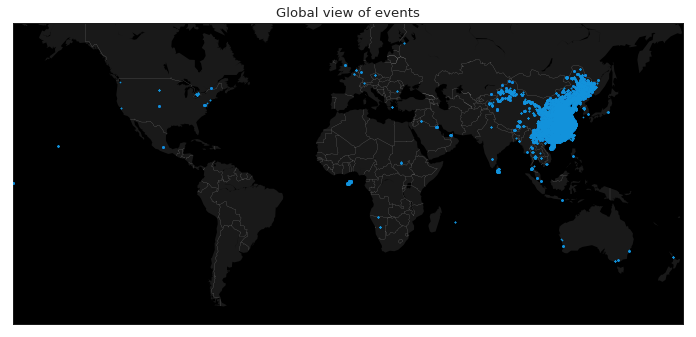

In [15]:
from mpl_toolkits.basemap import Basemap
# Mercator of World
#https://basemaptutorial.readthedocs.io/en/latest/basemap.html
#The basemap instance can be used to calculate positions on the map when we give longitude and latitude and the inverse operation
plt.figure(1, figsize=(12,6))
#Using cyl, merc, mill, cea and gall projections, the corners are assumed to be -180, -90, 180, 90 (all the globe) by default if
#they are not set
#here we are not drawing whole globe so we will pass the bounding box
m1 = Basemap(projection='merc',
             llcrnrlat=-60,
             urcrnrlat=65,
             llcrnrlon=-180,
             urcrnrlon=180,
             resolution='c')
#llcrnrlat=The lower left corner geographical latitude #in above we taken value related postivie max
#urcrnrlat=The upper right corner geographical latitude#in our data highest latitude is around 55
#llcrnrlon=The lower left corner geographical longitude#in our data lower longitude is -180
#urcrnrlon=The upper right corner geographical longitude#in our data highest longitude is around 175
#resolution=c is nothing crude-that is natural or not processed map



m1.fillcontinents(color='#191919',lake_color='#000000') # color is continent color and it is dark grey land,lack color is  black lakes
m1.drawmapboundary(fill_color='#000000')                # black background
m1.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders

# Plot the data
mxy = m1(events["longitude"].tolist(), events["latitude"].tolist())#mxy contains longitude and latitude list
m1.scatter(mxy[0], mxy[1], s=3, c="#1292db", lw=0, alpha=1, zorder=5)
#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
#s=3 is here marker size
#c is marker color
#The alpha blending(mixing) value, between 0 (transparent) and 1 (opaque).
plt.title("Global view of events")
plt.show()


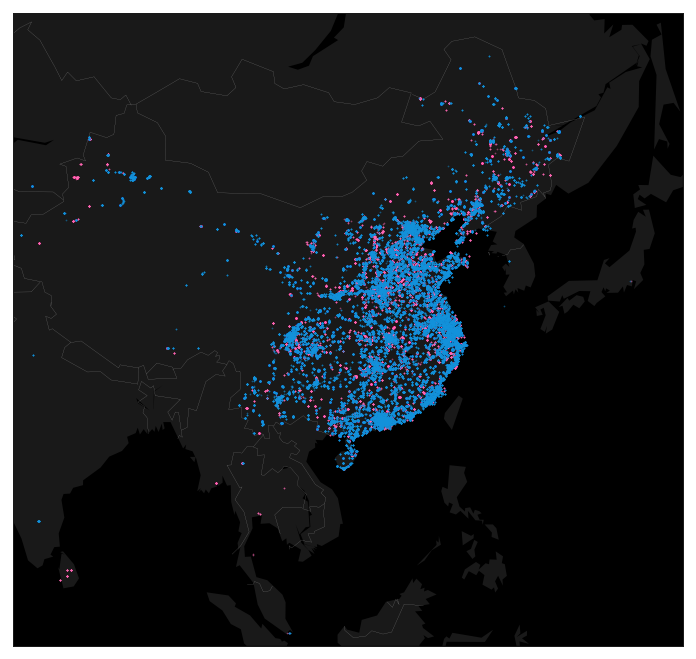

In [16]:
#events_train = train.merge(events, how='left', on='device_id')

female_events = labelled_app_events[labelled_app_events['gender'] == 'F']#considering only Female users
male_events = labelled_app_events[labelled_app_events['gender'] == 'M']#considering only male users
plt.figure(2, figsize=(12,12))
m2 = Basemap(projection='merc',
              llcrnrlat=0,
             urcrnrlat=55,
             llcrnrlon=75,
             urcrnrlon=145,
             lat_ts=0,
             resolution='c')
#llcrnrlat=The lower left corner geographical latitude #in above we taken value related postivie max
#urcrnrlat=The upper right corner geographical latitude#in our data highest latitude is around 55
#llcrnrlon=The lower left corner geographical longitude#in our data lower longitude is -180
#urcrnrlon=The upper right corner geographical longitude#in our data highest longitude is around 175
#resolution=c is nothing crude-that is natural or not processed map

m2.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m2.drawmapboundary(fill_color='#000000')                # black background
m2.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders

#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
#s=3 is here marker size
#c is marker color
#The alpha blending(mixing) value, between 0 (transparent) and 1 (opaque).
# Plot the data
mxy = m2(female_events["longitude"].tolist(), female_events["latitude"].tolist())
m2.scatter(mxy[0], mxy[1], s=3, c="#ff69b4", lw=0, alpha=0.5, zorder=5)

mxy = m2(male_events["longitude"].tolist(), male_events["latitude"].tolist())
m2.scatter(mxy[0], mxy[1], s=3, c="#1292db", lw=0, alpha=0.5, zorder=5)



The tables above show that the majority of the events happen around (0,0) which
is located in the middle of the Atlantic Ocean. It is safe to assume that these
logs on position are a product of users not wanting to share their position and
therefore are useless. The majority of the other coordinates are located in China,
only a few pin users in other parts of the world. Although a third of the data
bears no information I still think it is worth to use the information on position
as the two figures show there is a cerain difference of distribution between females and males

Now we are trying to get the information about devices with events and devices without events

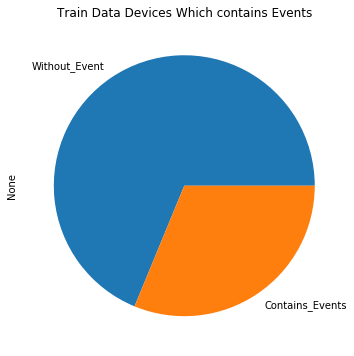

Has Events Percentage:  31.23  %
No Events Percentage:  68.77  %


In [34]:
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.in1d.html
#numpy.in1d ...Test whether each element of a 1-D array is also present in a second array and returns the boolean array
plt.figure(figsize=(10,6))
devices_events_array=np.in1d(gender_age_train['device_id'].values,events['device_id'].values)
device_event_column=pd.Series(devices_events_array).map({True:'Contains_Events',False:'Without_Event'})# it is like making a column with values Contains_Events and without events
device_events_count=device_event_column.value_counts()#howmany are true and howmany are false
device_event_column.value_counts().plot.pie()#Getting a pie chart with value counts
plt.title("Train Data Devices Which contains Events")
plt.show()
print("Has Events Percentage: ",np.round((device_events_count['Contains_Events']/(device_events_count['Contains_Events']+device_events_count['Without_Event']))*100,2), " %")
print("No Events Percentage: ",np.round((device_events_count['Without_Event']/(device_events_count['Contains_Events']+device_events_count['Without_Event']))*100,2), " %")

# Events Analysis on Test Data

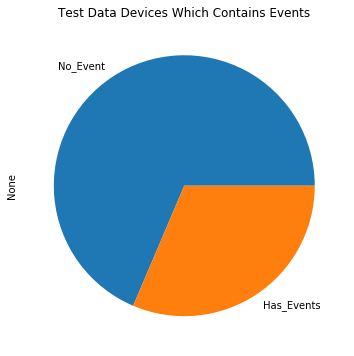

Has Events Percentage:  31.4  %
No Events Percentage:  68.6  %


In [35]:
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.in1d.html
plt.figure(figsize=(10,6))
devices_have_array=np.in1d(gender_age_test['device_id'].values,events['device_id'].values)
device_event_column=pd.Series(devices_have_array).map({True:'Has_Events',False:'No_Event'})
device_events_count=device_event_column.value_counts()
device_event_column.value_counts().plot.pie()
plt.title("Test Data Devices Which Contains Events")
plt.show()
print("Has Events Percentage: ",np.round((device_events_count['Has_Events']/(device_events_count['Has_Events']+device_events_count['No_Event']))*100,2), " %")
print("No Events Percentage: ",np.round((device_events_count['No_Event']/(device_events_count['Has_Events']+device_events_count['No_Event']))*100,2), " %")

**Observation:**
Devices with events nearly 31.4% and device without events nearly 68.6% both in train and test data

**App Labels Data**

In [36]:
app_labels=pd.read_csv('app_labels.csv')
print('Number of apps: ',app_labels.shape[0])

Number of apps:  459943


In [37]:
app_labels.head()

,app_id,label_id
0,7324884708820027918,251
1,-4494216993218550286,251
2,6058196446775239644,406
3,6058196446775239644,407
4,8694625920731541625,406


In [38]:
unique_app_labels=np.unique(app_labels['label_id'].values)
print("Number of Unique App Labels: ", len(unique_app_labels))

Number of Unique App Labels:  507


we can get the information of most used app categories from below code 

In [39]:
apps_label_category=pd.merge(app_labels,label_categories,on='label_id',how='left')

In [40]:
apps_label_category.head()

,app_id,label_id,category
0,7324884708820027918,251,Finance
1,-4494216993218550286,251,Finance
2,6058196446775239644,406,unknown
3,6058196446775239644,407,DS_P2P net loan
4,8694625920731541625,406,unknown


In [41]:
# https://stackoverflow.com/questions/20944483/python-3-sort-a-dict-by-its-values
#Sorting dict by value in decending order and storing keys
cat_dict=dict(apps_label_category['category'].value_counts())
cat_keys = [k for k in sorted(cat_dict, key=cat_dict.get, reverse=True)]#ascending order of keys based on it's values
#considering Top 10 keys with highest values 
cat_top_keys=cat_keys[:10]
cat_top_values=[cat_dict.get(k) for k in cat_top_keys]#getting values of top 15 app categories

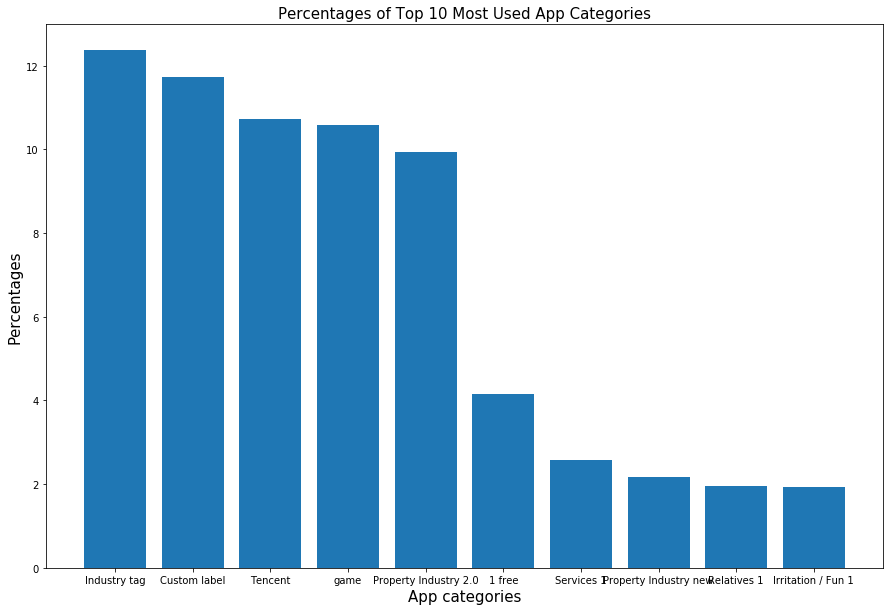

----------------------------------------------------------------------------------------------------
Category:  Industry tag 12.37  %
Category:  Custom label 11.73  %
Category:  Tencent 10.72  %
Category:  game 10.59  %
Category:  Property Industry 2.0 9.94  %
Category:  1 free 4.15  %
Category:  Services 1 2.57  %
Category:  Property Industry new 2.16  %
Category:  Relatives 1 1.96  %
Category:  Irritation / Fun 1 1.92  %


In [42]:
#This code is same as code used for brands analysis
plt.figure(figsize=(15,10))
indices=np.arange(len(cat_top_keys))
counts=np.array(cat_top_values)
percent=(counts/apps_label_category.shape[0])*100
plt.bar(indices,percent)
plt.xlabel('App categories',fontsize=15)
plt.ylabel('Percentages',fontsize=15)
plt.title('Percentages of Top 10 Most Used App Categories',fontsize=15)
plt.xticks(indices,cat_top_keys)
plt.show()
print("-"*100)
for i in range(len(cat_top_keys)):
    print("Category: ",cat_top_keys[i],np.round(percent[i],2)," %")

Observation :
Industry and Custom label app categories are more in number

**App Events Data**

In [43]:
app_events=pd.read_csv('app_events.csv')
print("Shape of the app_evetns : ",app_events.shape)
app_events.head()

Shape of the app_evetns :  (32473067, 4)


,event_id,app_id,is_installed,is_active
0,2,5927333115845830913,1,1
1,2,-5720078949152207372,1,0
2,2,-1633887856876571208,1,0
3,2,-653184325010919369,1,1
4,2,8693964245073640147,1,1


In [44]:
unique_apps=np.unique(app_events['app_id'].values)
unique_events=np.unique(app_events['event_id'].values)
print("Number of unique apps: ",len(unique_apps))
print("Number of unique events: ",len(unique_events))

Number of unique apps:  19237
Number of unique events:  1488096


# Analysing the Active and Inactive events

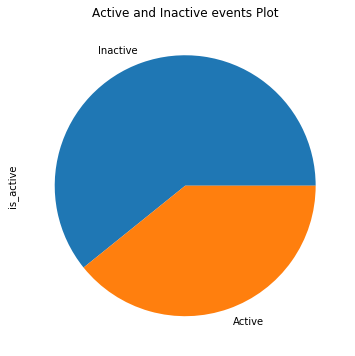

Active Events:  39.21  %
Inactive Events:  60.79  %


In [45]:
plt.figure(figsize=(10,6))
plt.title('Active and Inactive events Plot')
app_events['is_active'].map({1:'Active',0:'Inactive'}).value_counts().plot.pie()#making pie charts with is_active and is_inactive
plt.show()
print("Active Events: ",np.round(app_events['is_active'].value_counts()[1]*100/app_events.shape[0],2)," %")
print("Inactive Events: ",np.round(app_events['is_active'].value_counts()[0]*100/app_events.shape[0],2)," %")

Observation : 
Inactive Events are more number compared to active events

In [46]:
app_events['is_installed'].value_counts()

1    32473067
Name: is_installed, dtype: int64

is_installed value is 1 for all the data points.so, it is not much useful

**Data Present in Train and Test Data**

In [47]:
#Drop duplicate in  phone_data
phone_data = phone_data.drop_duplicates('device_id',keep='first').set_index('device_id')

In [48]:
gender_age_train=gender_age_train.set_index('device_id')
gender_age_test=gender_age_test.set_index('device_id')
events=events.set_index('device_id')

Since Both the Dataframes have device_id as indices , brand column will have phone_brand values corresponding to a device_id in phone_data

In [49]:
gender_age_train['brand']=phone_data['phone_brand']#adding brand column to gender_age_train
gender_age_test['brand']=phone_data['phone_brand']#adding brand column to gender_age_test
# Combining Device Model and Brand Name to create unique combinations of device models
phone_data['model']=phone_data['phone_brand'].str.cat(phone_data['device_model'])#concatenating device model and brand
gender_age_train['model']=phone_data['model']#adding model column to gender_Age_train
gender_age_test['model']=phone_data['model']#adding model column to gender_age_test

In [50]:
train_brand_set=set(gender_age_train['brand'].values)#which will give us unique brands in train data
test_brand_set=set(gender_age_test['brand'].values)#which will give us unique brands in terst data
train_model_set=set(gender_age_train['model'].values)#which will give us unique model in train data
test_model_set=set(gender_age_test['model'].values)#which will give us unique model in terst data
brand_train_test_common=test_brand_set.intersection(train_brand_set)#brands which are common in both test and train
model_train_test_common=test_model_set.intersection(train_model_set)#models which are common in both test and train
brands_test_not_common=len(test_brand_set)-len(brand_train_test_common)#brands in test but not in train data
models_test_not_common=len(test_model_set)-len(model_train_test_common)#models in test but not in train data
print("Number of uniue brands in train data: ",len(train_brand_set))
print("Number of uniue brands in test Data: ",len(test_brand_set))
print("Number of uniue brands common in both train and test Data: ",len(brand_train_test_common))
print("percentage of common brands: ",np.round((len(brand_train_test_common)/len(np.unique(phone_data['phone_brand'].values))*100),2)," %")
print("Number of brands in test but not in train: ",brands_test_not_common)
print("percentage of brands in test but not in train: ",np.round((brands_test_not_common/len(np.unique(phone_data['phone_brand'].values))*100),2)," %")
print("*"*100)
print("Number of Uniue Models in Train Data: ",len(train_model_set))
print("Number of Uniue Models in Test Data: ",len(test_model_set))
print("Number of Uniue Models Common in Both Train and Test Data: ",len(model_train_test_common))
print("Percentage of Common Models: ",np.round((len(model_train_test_common)/len(np.unique(phone_data['model'].values))*100),2)," %")
print("Number of Models in Test but not in Train: ",models_test_not_common)
print("Percentage of Models in Test but not in Train: ",np.round((models_test_not_common/len(np.unique(phone_data['model'].values))*100),2)," %")

Number of uniue brands in train data:  119
Number of uniue brands in test Data:  125
Number of uniue brands common in both train and test Data:  114
percentage of common brands:  87.69  %
Number of brands in test but not in train:  11
percentage of brands in test but not in train:  8.46  %
****************************************************************************************************
Number of Uniue Models in Train Data:  1486
Number of Uniue Models in Test Data:  1589
Number of Uniue Models Common in Both Train and Test Data:  1408
Percentage of Common Models:  84.46  %
Number of Models in Test but not in Train:  181
Percentage of Models in Test but not in Train:  10.86  %


### Conculsions on EDA

1. Only 31% of Both Train and Test Data have Events and App Related Features
2. We need to use Phone Brand and Phone Model Data for Devices without Events
3. We can use event related features along with Phone brand and model features for Devices which contain event information

## 4. Data Processing Considerations

1. We need to encode our class variables (group column in train data) into 12 classes starting from 0-11
2. Drop the age and gender columns in train
3. We will Separate the Data with Events and Data without Events

In [315]:
train_data=pd.read_csv('gender_age_train.csv')
test_data=pd.read_csv('gender_age_test.csv')

In [316]:
events = pd.read_csv('events.csv',  parse_dates=['timestamp'], index_col='event_id')#to parese timestamp column as dates 

In [317]:
#LabelEncoder to change this multicalss values into vectors.
class_encoder=LabelEncoder()
encoded_y=class_encoder.fit_transform(train_data['group'])
print("Number of classes: ",len(class_encoder.classes_))
print("classes: ",class_encoder.classes_)
# Encoded classes
print("Encoded classes: ", class_encoder.transform(class_encoder.classes_))

Number of classes:  12
classes:  ['F23-' 'F24-26' 'F27-28' 'F29-32' 'F33-42' 'F43+' 'M22-' 'M23-26'
 'M27-28' 'M29-31' 'M32-38' 'M39+']
Encoded classes:  [ 0  1  2  3  4  5  6  7  8  9 10 11]


In [318]:
train_data['Class']=encoded_y

In [319]:
#we will drop age gender and group as discussed in previous lines
train_data.drop(['age','gender','group'],axis=1,inplace=True)

In [320]:
#Extracting train data which has events using numpy.in1d
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.in1d.html
train_devices_have_events=np.in1d(train_data['device_id'].values,events['device_id'].values)

In [321]:
train_data['has_events']=train_devices_have_events

In [322]:
train_data['has_events'].value_counts()

False    51336
True     23309
Name: has_events, dtype: int64

In [323]:
#Extracting train data which has events using numpy.in1d
test_devices_have_events=np.in1d(test_data['device_id'].values,events['device_id'].values)

In [324]:
test_data['has_events']=test_devices_have_events

In [325]:
test_data['has_events'].value_counts()

False    76877
True     35194
Name: has_events, dtype: int64

In [326]:
train_data.head()

,device_id,Class,has_events
0,-8076087639492063270,10,False
1,-2897161552818060146,10,False
2,-8260683887967679142,10,True
3,-4938849341048082022,9,False
4,245133531816851882,9,False


In [327]:
train_data.shape

(74645, 3)

In [328]:
test_data.head()

,device_id,has_events
0,1002079943728939269,True
1,-1547860181818787117,True
2,7374582448058474277,True
3,-6220210354783429585,True
4,-5893464122623104785,False


In [329]:
test_data.shape

(112071, 2)

In [330]:
train_data.to_csv('Train_Data_with_events_details.csv')#which contains unnamed(index),device_id,has_events column
test_data.to_csv('Test_Data_with_evetns_details.csv')#which contains unnamed(index),device_id,has_events column

## 5. Splitting the Data into two different parts

Here we have two types of data :

    1.Data with events
    
    2.Data without events
    
Data with events(31%): we can use features which are linked to events like event occcured hour ,is_active and feature engineering

Data without events(69%) :Here we use features like phone brand phone model

In [331]:
train_data=pd.read_csv('Train_Data_with_events_details.csv')
test_data=pd.read_csv('Test_Data_with_evetns_details.csv')

In [332]:
train_data.drop(['Unnamed: 0'],axis=1,inplace=True)#removing the first column which does nt have any column name...
test_data.drop(['Unnamed: 0'],axis=1,inplace=True)#removing the first column which does not have any column name....

In [333]:
events_train_data=train_data.loc[train_data['has_events']==True]#To get data with events
events_test_data=test_data.loc[test_data['has_events']==True]

In [334]:
noevents_train_data=train_data.loc[train_data['has_events']==False]#to get data without events
noevents_test_data=test_data.loc[test_data['has_events']==False]

In [335]:
events_train_data.drop(['has_events'],axis=1,inplace=True)# we are keeping only device id by dropping has_events column
events_test_data.drop(['has_events'],axis=1,inplace=True)

In [336]:
events = pd.read_csv('events.csv',  parse_dates=['timestamp'], index_col='event_id')

In [337]:
phone_data=pd.read_csv('phone_brand_device_model.csv')

# we are droping Duplicate Devices and set Device_id as index like we did for Data while importing
phone_data = phone_data.drop_duplicates('device_id',keep='first').set_index('device_id')

# we take event_id, app_id and is_active.we dont take is_installed feature as it is not much useful
app_events = pd.read_csv('app_events.csv', usecols=['event_id','app_id','is_active'], dtype={'is_active':bool})#we are treating is_active data type as boolean
app_labels = pd.read_csv('app_labels.csv')
label_categories = pd.read_csv('label_categories.csv')

print("Train Data Shape: ",train_data.shape)
print("Test Data Shape: ",test_data.shape)
print("Train Data with Events Shape: ",events_train_data.shape)
print("Test Data with Events Shape: ",events_test_data.shape)
print("Phone Data Shape: ",phone_data.shape)
print("Events Data Shape: ",events.shape)
print("App Events Data Shape: ",app_events.shape)
print("App Labels Shape: ",app_labels.shape)
print("Label Categories Shape: ",label_categories.shape)

Train Data Shape:  (74645, 3)
Test Data Shape:  (112071, 2)
Train Data with Events Shape:  (23309, 2)
Test Data with Events Shape:  (35194, 1)
Phone Data Shape:  (186716, 2)
Events Data Shape:  (3252950, 4)
App Events Data Shape:  (32473067, 3)
App Labels Shape:  (459943, 2)
Label Categories Shape:  (930, 2)


In [338]:
#Setting device_id as index for Train, Test Data
train_data=train_data.set_index('device_id')
test_data=test_data.set_index('device_id')
events_train_data=events_train_data.set_index('device_id')
events_test_data=events_test_data.set_index('device_id')

In [339]:
noevents_train_data=noevents_train_data.set_index('device_id')
noevents_test_data=noevents_test_data.set_index('device_id')

We will create coloumns trainrow, testrow in Train and Test Data to indicate which row a particular device belongs to and this will be useful in our One-hot encoded Sparse Matrix Creation, in which we will specify number of rows in the sparse matrix

In [340]:
#we will use numpy.arange function to create row numbers 
train_data['trainrow']=np.arange(train_data.shape[0])#all devices
events_train_data['trainrow']=np.arange(events_train_data.shape[0])#devices with events

test_data['testrow']=np.arange(test_data.shape[0])#all devices
events_test_data['testrow']=np.arange(events_test_data.shape[0])#devices with events

In [341]:
noevents_train_data['trainrow']=np.arange(noevents_train_data.shape[0])#devices without events
noevents_test_data['testrow']=np.arange(noevents_test_data.shape[0])#devices without events

We will consider phone model data in two different ways 

1. For data which contains events we concatenate phone brand and model 
2. we won't concatenate brand and model for data without events

In [342]:
#Converting Categorical Brands in phone data to Integers from 0 to number of unique brands -1
brand_encoder = LabelEncoder().fit(phone_data['phone_brand'])
phone_data['brand'] = brand_encoder.transform(phone_data['phone_brand'])
nbrands=len(brand_encoder.classes_)# number of unique apps it will be used in creating One-Hot Encoding of Brands

#Concatinating Phone Brand and Model 
concat_model = phone_data['phone_brand'].str.cat(phone_data['device_model'])
#Converting Categorical Maodel in phone data  to Integers from 0 to number of unique models -1
model_encoder=LabelEncoder().fit(concat_model)
phone_data['model_brand']=model_encoder.transform(concat_model)
nmodels=len(model_encoder.classes_)# number of unique apps it will be used in creating One-Hot Encoding of Models

In [343]:
model_encode=LabelEncoder().fit(phone_data['device_model'])
phone_data['model']=model_encode.transform(phone_data['device_model'])
num_models=len(model_encoder.classes_)

In [344]:
#Both the dataframes have device_id as indices so phone_brand and model corresponding to a device_id get copied to appropriate
#columns
train_data['phone_brand']=phone_data['brand']#adding encoded brand data to train data
test_data['phone_brand']=phone_data['brand']#adding encoded brand data to test data
train_data['phone_model']=phone_data['model']#adding encoded model data to train data
test_data['phone_model']=phone_data['model']#adding encoded model data to test data
events_train_data['phone_brand']=phone_data['brand']#adding encoded brand data to train data with events
events_test_data['phone_brand']=phone_data['brand']#adding encoded brand data to test data with events
events_train_data['phone_model']=phone_data['model_brand']#addding encoded model+brand data to train data with events
events_test_data['phone_model']=phone_data['model_brand']#adding encoded model+brand data to test data with events

In [345]:
#we dont add encoded model+brand data to nonevents data
noevents_train_data['phone_brand']=phone_data['brand']#adding encoded brand data to train data without events
noevents_test_data['phone_brand']=phone_data['brand']#adding encoded brand data to test data without events
noevents_train_data['phone_model']=phone_data['model']#adding encoded model data to train data without events
noevents_test_data['phone_model']=phone_data['model']#adding encoded model data to test data without events 

### 5.1. Label Encoding of Apps

Reference: https://www.kaggle.com/dvasyukova/a-linear-model-on-apps-and-labels

Here For Each device we want to know which all apps were installed in the device.

1.we will first encode All the App Ids as integers from 0 to number of unique apps - 1.

2.To get the Apps which are installed in a device denoted by device_id, we merge device_id column from events table to app_events.

3.Group the resulting dataframe by device_id and app and aggregate.

4.we then Merge in the trainrow, testrow  columns to know at which row to put each device in the features matrix

In [346]:
app_encoder = LabelEncoder().fit(app_events['app_id'])

app_events['app'] = app_encoder.transform(app_events['app_id'])

napps = len(app_encoder.classes_)# number of unique apps it will be used in creating One-Hot Encoding of Apps 

deviceapps = (app_events.merge(events[['device_id']], how='left',left_on='event_id',right_index=True)
                       .groupby(['device_id','app'])['app'].agg(['size'])
                       .merge(events_train_data[['trainrow']], how='left', left_index=True, right_index=True)#merges by index which is device_id from train data with events
                       .merge(events_test_data[['testrow']], how='left', left_index=True, right_index=True)#merges by index which is device_id from test data with events
                       .reset_index())
deviceapps.head()

,device_id,app,size,trainrow,testrow
0,-9222956879900151005,548,18,5145.0,NaN
1,-9222956879900151005,1096,18,5145.0,NaN
2,-9222956879900151005,1248,26,5145.0,NaN
3,-9222956879900151005,1545,12,5145.0,NaN
4,-9222956879900151005,1664,18,5145.0,NaN


### 5.2. Labels Encoding

App Labels are also created in a similar approach by merging with deviceapps dataframe and grouping by labels and then merging it with trainrow, testrow to know at which row to put each device in the feature matrix

In [347]:
app_labels = app_labels.loc[app_labels['app_id'].isin(app_events['app_id'].unique())]#we are taking app_id's existed both in app_events and app_labels
app_labels['app'] = app_encoder.transform(app_labels['app_id'])#encoding common app_id's from above line
labelencoder = LabelEncoder().fit(app_labels['label_id'])#now encoding app_labels
app_labels['label'] = labelencoder.transform(app_labels['label_id'])
nlabels = len(labelencoder.classes_)

In [348]:
devicelabels = (deviceapps[['device_id','app']]
                .merge(app_labels[['app','label']])
                .groupby(['device_id','label'])['app'].agg(['size'])
                .merge(events_train_data[['trainrow']], how='left', left_index=True, right_index=True)#merges by index which is device_id from train data with events
                .merge(events_test_data[['testrow']], how='left', left_index=True, right_index=True)#merges by index which is device_id from test data with events
                .reset_index())#resetting index to default indices
devicelabels.head()

,device_id,label,size,trainrow,testrow
0,-9222956879900151005,117,1,5145.0,NaN
1,-9222956879900151005,120,1,5145.0,NaN
2,-9222956879900151005,126,1,5145.0,NaN
3,-9222956879900151005,138,2,5145.0,NaN
4,-9222956879900151005,147,2,5145.0,NaN


### 5.3. Event Day and Time Features

# Featute Engineering Throuh Feature Binning concept

In [349]:
#Extracting Hours from Events Time Stamp by using map function 
events['hour'] = events['timestamp'].map(lambda x:pd.to_datetime(x).hour)
events['hourbin'] = [1 if ((x>=1)&(x<=6)) else 2 if ((x>=7)&(x<=12)) else 3 if ((x>=13)&(x<=18)) else 4 for x in events['hour']]

Grouping hours by device_id, and concatinating all the hours which occur for a particular device_id and forming a string of all the hours for that device.Appending a '0' string before integers as TFidf or Count Vectorizer strangely don't count single digit numbers as strings

In [350]:
hourevents = events.groupby("device_id")["hour"].apply(lambda x: " ".join('0'+str(s) for s in x))
hourevents.head()

device_id
-9222956879900151005    011 012 015 012 015 021 015 015 021 07 012 015...
-9222661944218806987                       021 019 022 018 018 018 00 018
-9222399302879214035              011 013 023 021 013 023 010 013 023 013
-9221825537663503111    07 07 07 08 013 07 06 07 07 08 013 08 013 010 ...
-9221767098072603291                         05 015 014 012 018 05 013 07
Name: hour, dtype: object

In [351]:
hourbinevents = events.groupby("device_id")["hourbin"].apply(lambda x: " ".join('0'+str(s) for s in x))
hourbinevents.head()

device_id
-9222956879900151005    02 02 03 02 03 04 03 03 04 02 02 03 03 02 02 0...
-9222661944218806987                              04 04 04 03 03 03 04 03
-9222399302879214035                        02 03 04 04 03 04 02 03 04 03
-9221825537663503111    02 02 02 02 03 02 01 02 02 02 03 02 03 02 02 0...
-9221767098072603291                              01 03 03 02 03 01 03 02
Name: hourbin, dtype: object

In [352]:
#Mapping The Values the values to train and test dataframes
events_train_data['event_hours']=events_train_data.index.map(hourevents)#mapping hourevents to train data with events based on index deviceid
events_test_data['event_hours']=events_test_data.index.map(hourevents)#mapping hourevents to test data with events based on index deviceid
events_train_data['event_hours_bins']=events_train_data.index.map(hourbinevents)#mapping houreventsbin to train data with events based on index deviceid
events_test_data['event_hours_bins']=events_test_data.index.map(hourbinevents)#mapping houreventsbins to test data with events based on index deviceid

In [353]:
events_train_data.head()

,Class,trainrow,phone_brand,phone_model,event_hours,event_hours_bins
device_id,,,,,,
-8260683887967679142,10,0,51,843,014,03
7477216237379271436,4,1,31,737,014 014 018 014 014 014 014,03 03 03 03 03 03 03
6352067998666467520,10,2,31,747,09 010 012 022 017 017 012 022 010 018 09,02 02 02 04 03 03 02 04 02 03 02
1508636020748379883,2,3,31,747,013 013 013 013 021 013 013 013 013 013 021 01...,03 03 03 03 04 03 03 03 03 03 04 03 03 04 02 0...
-6876541075223249434,11,4,128,1659,017 08 017 08 02 017 016 013 013 08 017 017 01...,03 02 03 02 01 03 03 03 03 02 03 03 03 01 03 0...


In [354]:
#Extracting Days of the week
days_of_week=events['timestamp'].dt.day_name()
events['day']=days_of_week.map({'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6})#mapping day to numeric digits

In [355]:
daysevents = events.groupby("device_id")["day"].apply(lambda x: " ".join('0'+str(s) for s in x))#concatening '0' to all single nubmerals
daysevents.head()

device_id
-9222956879900151005    06 06 06 06 05 05 05 05 05 06 06 05 05 06 06 0...
-9222661944218806987                              03 04 01 00 06 05 00 02
-9222399302879214035                        03 01 02 05 03 03 03 03 02 01
-9221825537663503111    06 06 05 00 04 05 05 05 04 00 04 00 01 01 00 0...
-9221767098072603291                              03 00 00 03 04 02 01 03
Name: day, dtype: object

In [356]:
events_train_data['event_day']=events_train_data.index.map(daysevents)#mapping days to train data with events
events_test_data['event_day']=events_test_data.index.map(daysevents)#mapping days to test data with events

### 5.4. Events Latitude and Longitudes

In [357]:
#Grouping by device_id and taking the median of latitude
lat_events = events.groupby("device_id")["latitude"].apply(lambda x: np.median([float(s) for s in x]))
lat_events.head()

device_id
-9222956879900151005    23.19
-9222661944218806987     0.00
-9222399302879214035     0.00
-9221825537663503111    33.63
-9221767098072603291     0.00
Name: latitude, dtype: float64

In [358]:
#Grouping by device_id and taking the median of longitude
long_events = events.groupby("device_id")["longitude"].apply(lambda x: np.median([float(s) for s in x]))
long_events.head()

device_id
-9222956879900151005    113.24
-9222661944218806987      0.00
-9222399302879214035      0.00
-9221825537663503111    113.48
-9221767098072603291      0.00
Name: longitude, dtype: float64

In [359]:
events_train_data['event_med_lat']=events_train_data.index.map(lat_events)#mapping lattitude_medians to events_train_data
events_test_data['event_med_lat']=events_test_data.index.map(lat_events)#mapping lattitude_medians to events_test_data

In [360]:
events_train_data['event_med_long']=events_train_data.index.map(long_events)#mapping longitude_medians to events_train_data
events_test_data['event_med_long']=events_test_data.index.map(long_events)#mapping longitude_medians to events_test_data

### 5.5. Apps is_active

First we group the is_active by event_id and create a string of is_active values, we then map these values to event_id in events table. Then we group these is_active labels by device_id and concatinate the values to from a string of is_active features

In [361]:
appsactive = app_events.groupby("event_id")["is_active"].apply(lambda x: " ".join(str(s) for s in x))#converting boolean to strings
appsactive.head()

event_id
2     True False False True True True False False Fa...
6     True True True True True False True False True...
7     False True False False True True False False F...
9     False False False False False False False True...
16    False False False False False False False True...
Name: is_active, dtype: object

In [362]:
#Mapping apps is_active to device_id
events["apps_active"] = events.index.map(appsactive)#mapping converted strings to events
events_apps_active_map = events.groupby("device_id")["apps_active"].apply(lambda x: " ".join(str(s) for s in x if str(s)!='nan'))#mapping only non-nan(status of is_active) acitve apps
events_apps_active_map.head()

device_id
-9222956879900151005    False False False False False False False True...
-9222661944218806987    True False True True True True True False Fals...
-9222399302879214035    False False False False False False False Fals...
-9221825537663503111    False False True False False True True False F...
-9221767098072603291    True False False False False True False True F...
Name: apps_active, dtype: object

In [363]:
#Mapping The Values the values to train and test dataframes
events_train_data['apps_active']=events_train_data.index.map(events_apps_active_map)#mapping non-nan statused apps to train data with events
events_test_data['apps_active']=events_test_data.index.map(events_apps_active_map)#mapping non-nan statused apps to test data with events

In [364]:
events_train_data.head()

,Class,trainrow,phone_brand,phone_model,event_hours,event_hours_bins,event_day,event_med_lat,event_med_long,apps_active
device_id,,,,,,,,,,
-8260683887967679142,10,0,51,843,014,03,00,0.00,0.00,False False False False True False True False ...
7477216237379271436,4,1,31,737,014 014 018 014 014 014 014,03 03 03 03 03 03 03,03 03 05 03 03 03 03,31.75,119.57,False True True True False True False False Tr...
6352067998666467520,10,2,31,747,09 010 012 022 017 017 012 022 010 018 09,02 02 02 04 03 03 02 04 02 03 02,04 04 04 02 04 04 04 02 04 03 04,0.00,0.00,False True True True True True True False True...
1508636020748379883,2,3,31,747,013 013 013 013 021 013 013 013 013 013 021 01...,03 03 03 03 04 03 03 03 03 03 04 03 03 04 02 0...,00 03 03 00 00 03 03 03 03 03 00 03 03 00 00 0...,31.90,120.26,True True True True True True True True True T...
-6876541075223249434,11,4,128,1659,017 08 017 08 02 017 016 013 013 08 017 017 01...,03 02 03 02 01 03 03 03 03 02 03 03 03 01 03 0...,03 05 01 05 00 01 05 00 00 05 01 01 05 00 05 0...,39.14,117.20,True False False True True True False False Fa...


In [365]:
train_data_store=events_train_data.reset_index()

In [366]:
test_data_store=events_test_data.reset_index()

In [367]:
train_data_noevents=noevents_train_data.reset_index()

In [368]:
test_data_noevents=noevents_test_data.reset_index()

In [369]:
#Storing the Processed Events Train Data
train_data_store.to_csv('Processed_events_train_data.csv')

In [370]:
#Storing the Processed Events Test
test_data_store.to_csv('Processed_events_test_data.csv')

In [371]:
#Storing the Processed No Events Train Data
train_data_noevents.to_csv('Processed_no_events_train_data.csv')

In [372]:
#Storing the Processed No Events Test
test_data_noevents.to_csv('Processed_no_events_test_data.csv')

In [373]:
#https://stackoverflow.com/questions/8955448/save-load-scipy-sparse-csr-matrix-in-portable-data-format
def save_sparse(filename, xmtr):
    """
    Takes the Sparse Matrix, file name as input and saves the Matrix as npz file
    """
    np.savez(filename,data = xmtr.data ,indices= xmtr.indices,
             indptr =xmtr.indptr, shape=xmtr.shape )

In [374]:
#https://stackoverflow.com/questions/8955448/save-load-scipy-sparse-csr-matrix-in-portable-data-format
def load_sparse(filename):
    """
    Takes the filename as input and loads the matrix stored as .npz file to a csr matrix and returns the matrix
    """
    tmp = np.load(filename)
    return csr_matrix((tmp['data'], tmp['indices'], tmp['indptr']), shape= tmp['shape'])

# Data we have till now :

We Use 2 Different Sets of Features for Data with Events and Data without Events
1. **Data Without Events:** One-hot Encodings of Phone Brand, Phone Model, has Event
2. **Data with Events:** One-hots of Apps, Labels, Phone Brand, Phone Model, Event Day, Event Hour, Standardized  Latitude and Longitude values

### 6.1. All Devices Data

One-Hot Encoding using CSR Matrix Approach Refered from: https://www.kaggle.com/dvasyukova/a-linear-model-on-apps-and-labels

We will Construct One-Hot Encoding for Phone Brand, Phone Model, Apps, App Labels using the Below CSR Matrix Constructor:

csr_matrix((data, (row_ind, col_ind)), [shape=(M, N)])

where ``data``, ``row_ind`` and ``col_ind`` satisfy the
relationship ``a[row_ind[k], col_ind[k]] = data[k]``

# Working principle of CSR matrix 

In [375]:
#consider below example
row = np.array([0, 1, 2, 3, 4, 5])# we are taking row index from 0 to 5
col = np.array([7, 8, 9,10,11,12])#col index from 7 to 12. so last possible combination will be a[row_ind[5],col_ind[5]]=a[5,12]
#so csr_matrix shape will be 6*13
#data will be assigned as a[row_ind[k],col_ind[k]=data[k]]
data = np.array([1, 1,1,1,1,1])
csr_matrix((data, (row, col))).toarray()


array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], dtype=int32)

# Another Example based on present Scenario

In [376]:
data = pd.DataFrame({'device_id': [1, 2, 3, 4, 5],'brand': ['Iphone', 'Iphone', 'Nokia', 'Nokia',  'Samsung']})
data.head()

,device_id,brand
0,1,Iphone
1,2,Iphone
2,3,Nokia
3,4,Nokia
4,5,Samsung


In [377]:
# Generate col_ind and row_ind
encoder = LabelEncoder().fit(data['brand']) #Encoding Brand which is a categorical feature to Integers 
col_ind = encoder.transform(data['brand'])
M = 5 # Number of Rows/Devices
N = 3  # Number of Unique Brands
row_ind = np.arange(M)
values = np.ones(M)
data['trainrow'] = row_ind

# Generate row_ind
print("col index which is Brands Encoded as Integers:", col_ind)
print("row_index which is the Number of Devices: ", row_ind)
print("data", values)

col index which is Brands Encoded as Integers: [0 0 1 1 2]
row_index which is the Number of Devices:  [0 1 2 3 4]
data [1. 1. 1. 1. 1.]


In [378]:
toy_data = csr_matrix((values, [row_ind, col_ind]), shape=(M, N))#shape here will be 5(Max index is 4)*3(Max index is 2)
toy_data.todense()#so her wherever data is present
#data will be assigned as a[row_ind[k],col_ind[k]=data[k]]

matrix([[1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

**Phone Brand One-Hot**

In [379]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html
Xtr_brand = csr_matrix((np.ones(train_data.shape[0]), # Number of Rows/Devices
                       (train_data.trainrow, train_data.phone_brand)))# columns as brands 
Xte_brand = csr_matrix((np.ones(test_data.shape[0]), # Number of Rows/Devices
                       (test_data.testrow, test_data.phone_brand)))
print("Train Brand One-hot Shape: ",Xtr_brand.shape)
print("Test Brand One-hot Shape: ",Xte_brand.shape)

Train Brand One-hot Shape:  (74645, 131)
Test Brand One-hot Shape:  (112071, 131)


# Analysis on above One-Hot :
    


In [380]:
train_data['phone_brand'].head()

device_id
-8076087639492063270    51
-2897161552818060146    51
-8260683887967679142    51
-4938849341048082022    51
 245133531816851882     51
Name: phone_brand, dtype: int32

# Analysis on one row of Xtr_brand matrix

In [381]:
print(Xtr_brand.toarray()[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In above example we can say that device 1, brand=51(encoded value)) = 1.so, Each row will have a single nonzero entry at position specified by brand and that entry's value is always one.

**Phone Model One-Hot**

In [382]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html
#Analysis as same as brand
Xtr_model = csr_matrix((np.ones(train_data.shape[0]), # Number of Rows/Devices
                       (train_data.trainrow, train_data.phone_model)))
Xte_model = csr_matrix((np.ones(test_data.shape[0]), # Number of Rows/Devices
                       (test_data.testrow, test_data.phone_model)))
print("Train Brand One-hot Shape: ",Xtr_model.shape)
print("Test Brand One-hot Shape: ",Xte_model.shape)

Train Brand One-hot Shape:  (74645, 1599)
Test Brand One-hot Shape:  (112071, 1599)


In [383]:
X_train_one_hot=hstack((Xtr_brand,Xtr_model),format='csr')
X_test_one_hot=hstack((Xte_brand,Xte_model),format='csr')

print("Final One-hot Encoded Data matrix")
print(X_train_one_hot.shape)
print(X_test_one_hot.shape)

Final One-hot Encoded Data matrix
(74645, 1730)
(112071, 1730)


In [384]:
#Saving One-hot encoded Matrices
save_sparse('Train_One_hot_brand_model_matrix',X_train_one_hot)
save_sparse('Test_One_hot_brand_model_matrix',X_test_one_hot)

### 6.2.  Devices With No Events

**Phone Brand One-Hot**

In [385]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html
Xtr_noevents_brand = csr_matrix((np.ones(noevents_train_data.shape[0]), # Number of Rows/Devices
                       (noevents_train_data.trainrow, noevents_train_data.phone_brand)))
Xte_noevents_brand = csr_matrix((np.ones(noevents_test_data.shape[0]), # Number of Rows/Devices
                       (noevents_test_data.testrow, noevents_test_data.phone_brand)))
print("Train Brand One-hot Shape: ",Xtr_noevents_brand.shape)
print("Test Brand One-hot Shape: ",Xte_noevents_brand.shape)

Train Brand One-hot Shape:  (51336, 131)
Test Brand One-hot Shape:  (76877, 131)


**Phone Model One-Hot**

In [386]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html
Xtr_noevents_model = csr_matrix((np.ones(noevents_train_data.shape[0]), # Number of Rows/Devices
                       (noevents_train_data.trainrow, noevents_train_data.phone_model)))
Xte_noevents_model = csr_matrix((np.ones(noevents_test_data.shape[0]), # Number of Rows/Devices
                       (noevents_test_data.testrow, noevents_test_data.phone_model)))
print("Train Brand One-hot Shape: ",Xtr_noevents_model.shape)
print("Test Brand One-hot Shape: ",Xte_noevents_model.shape)

Train Brand One-hot Shape:  (51336, 1599)
Test Brand One-hot Shape:  (76877, 1599)


In [387]:
X_train_noevents_one_hot=hstack((Xtr_noevents_brand,Xtr_noevents_model),format='csr')
X_test_noevents_one_hot=hstack((Xte_noevents_brand,Xte_noevents_model),format='csr')

print("Final One-hot Encoded Data matrix")
print(X_train_noevents_one_hot.shape)
print(X_test_noevents_one_hot.shape)

Final One-hot Encoded Data matrix
(51336, 1730)
(76877, 1730)


In [388]:
#Saving One-hot encoded Matrices
save_sparse('Train_Noevents_One_hot_brand_model_matrix',X_train_noevents_one_hot)
save_sparse('Test_Noevents_One_hot_brand_model_matrix',X_test_noevents_one_hot)

### 6.3.  Devices With Events

**Phone Brand One-Hot**

In [389]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html
Xtr_events_brand = csr_matrix((np.ones(events_train_data.shape[0]), # Number of Rows/Devices
                       (events_train_data.trainrow, events_train_data.phone_brand)), 
                              shape=(events_train_data.shape[0],nbrands))
Xte_events_brand = csr_matrix((np.ones(events_test_data.shape[0]), # Number of Rows/Devices
                       (events_test_data.testrow, events_test_data.phone_brand)),
                             shape=(events_test_data.shape[0],nbrands))
print("Train Brand One-hot Shape: ",Xtr_events_brand.shape)
print("Test Brand One-hot Shape: ",Xte_events_brand.shape)

Train Brand One-hot Shape:  (23309, 131)
Test Brand One-hot Shape:  (35194, 131)


**Phone Model One-Hot**

In [390]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html
Xtr_events_model = csr_matrix((np.ones(events_train_data.shape[0]), # Number of Rows/Devices
                       (events_train_data.trainrow, events_train_data.phone_model)),
                         shape=(events_train_data.shape[0],nmodels))
Xte_events_model = csr_matrix((np.ones(events_test_data.shape[0]), # Number of Rows/Devices
                       (events_test_data.testrow, events_test_data.phone_model)),
                           shape=(events_test_data.shape[0],nmodels))
print("Train Model One-hot Shape: ",Xtr_events_model.shape)
print("Test Model One-hot Shape: ",Xte_events_model.shape)

Train Model One-hot Shape:  (23309, 1667)
Test Model One-hot Shape:  (35194, 1667)


**Event Apps One-Hot Encoding**

In [391]:
#Since the Deviceapps has both train and test columns merged to create Train Apps One-Hot we will Drop all Nan of Train Row
#Once we remove Nan in Train Rows we will get the Apps in Train Data and we create CSR Matrix for those rows
d = deviceapps.dropna(subset=['trainrow'])#based on trainrow we drop
Xtr_events_app = csr_matrix((np.ones(d.shape[0]), (d.trainrow, d.app)), 
                      shape=(events_train_data.shape[0],napps))
#Since the Deviceapps has both train and test columns merged to create Test Apps One-Hot we will Drop all Nan of Test Row
#Once we remove Nan in Test Rows we will get the Apps in Test Data and we create CSR Matrix for those rows
d = deviceapps.dropna(subset=['testrow'])#based on test row we drop
Xte_events_app = csr_matrix((np.ones(d.shape[0]), (d.testrow, d.app)), 
                      shape=(events_test_data.shape[0],napps))
print("Train Event Apps One-hot Shape: ",Xtr_events_app.shape)
print("Test Event Apps One-hot Shape: ",Xte_events_app.shape)

Train Event Apps One-hot Shape:  (23309, 19237)
Test Event Apps One-hot Shape:  (35194, 19237)


**Event Labels One-Hot Encoding**

In [392]:
#Since the Devicelabels has both train and test columns merged to create Train Labels One-Hot we will Drop all Nan of Train Row
#Once we remove Nan in Train Rows we will get the Labels in Train Data and we create CSR Matrix for those rows
d = devicelabels.dropna(subset=['trainrow'])##based on trainrow we drop
Xtr_events_label = csr_matrix((np.ones(d.shape[0]), (d.trainrow, d.label)), 
                      shape=(events_train_data.shape[0],nlabels))
#Since the Devicelabels has both train and test columns merged to create Test Labels One-Hot we will Drop all Nan of Test Row
#Once we remove Nan in Test Rows we will get the Labels in Test Data and we create CSR Matrix for those rows
d = devicelabels.dropna(subset=['testrow'])#based on test row  we drop
Xte_events_label = csr_matrix((np.ones(d.shape[0]), (d.testrow, d.label)), 
                      shape=(events_test_data.shape[0],nlabels))
print("Train Event Labels One-hot Shape: ",Xtr_events_label.shape)
print("Test Event Labels One-hot Shape: ",Xte_events_label.shape)

Train Event Labels One-hot Shape:  (23309, 492)
Test Event Labels One-hot Shape:  (35194, 492)


**Event Hours TFIDF Vector Encodings**

In [393]:
events_train_data['event_hours'].head()

device_id
-8260683887967679142                                                  014
 7477216237379271436                          014 014 018 014 014 014 014
 6352067998666467520            09 010 012 022 017 017 012 022 010 018 09
 1508636020748379883    013 013 013 013 021 013 013 013 013 013 021 01...
-6876541075223249434    017 08 017 08 02 017 016 013 013 08 017 017 01...
Name: event_hours, dtype: object

In [394]:
# we are vectorzing with TFIDF because event_hours row looks like a text.
vectorizer_EH=TfidfVectorizer()
vectorizer_EH.fit(events_train_data['event_hours'].values)

X_tr_event_hours_one_hot = vectorizer_EH.transform(events_train_data['event_hours'].values)
X_te_event_hours_one_hot = vectorizer_EH.transform(events_test_data['event_hours'].values)

print("Train Event Hours One-hot Shape: ",X_tr_event_hours_one_hot.shape)
print("Test Event Hours One-hot Shape: ",X_te_event_hours_one_hot.shape)

Train Event Hours One-hot Shape:  (23309, 24)
Test Event Hours One-hot Shape:  (35194, 24)


**Event Hour Bins One-Hot Encodings**

In [395]:
events_train_data['event_hours_bins'].head()

device_id
-8260683887967679142                                                   03
 7477216237379271436                                 03 03 03 03 03 03 03
 6352067998666467520                     02 02 02 04 03 03 02 04 02 03 02
 1508636020748379883    03 03 03 03 04 03 03 03 03 03 04 03 03 04 02 0...
-6876541075223249434    03 02 03 02 01 03 03 03 03 02 03 03 03 01 03 0...
Name: event_hours_bins, dtype: object

In [396]:
vectorizer_EHB=CountVectorizer(binary=True)
vectorizer_EHB.fit(events_train_data['event_hours_bins'].values)

X_tr_event_hours_bins_one_hot = vectorizer_EHB.transform(events_train_data['event_hours_bins'].values)
X_te_event_hours_bins_one_hot = vectorizer_EHB.transform(events_test_data['event_hours_bins'].values)
print("After vectorizations")
print("Train Event Hours Bins One-hot Shape: ",X_tr_event_hours_bins_one_hot.shape)
print("Test Event Hours Bins One-hot Shape: ",X_te_event_hours_bins_one_hot.shape)

After vectorizations
Train Event Hours Bins One-hot Shape:  (23309, 4)
Test Event Hours Bins One-hot Shape:  (35194, 4)


**Event Day TFIDF Encodings**

In [397]:
events_train_data['event_day'].head()

device_id
-8260683887967679142                                                   00
 7477216237379271436                                 03 03 05 03 03 03 03
 6352067998666467520                     04 04 04 02 04 04 04 02 04 03 04
 1508636020748379883    00 03 03 00 00 03 03 03 03 03 00 03 03 00 00 0...
-6876541075223249434    03 05 01 05 00 01 05 00 00 05 01 01 05 00 05 0...
Name: event_day, dtype: object

In [398]:
#
vectorizer_ED=TfidfVectorizer()
vectorizer_ED.fit(events_train_data['event_day'].values)

X_tr_event_day_one_hot = vectorizer_ED.transform(events_train_data['event_day'].values)
X_te_event_day_one_hot = vectorizer_ED.transform(events_test_data['event_day'].values)
print("After vectorizations")
print("Train Event Day One-hot Shape: ",X_tr_event_day_one_hot.shape)
print("Test Event Day One-hot Shape: ",X_te_event_day_one_hot.shape)

After vectorizations
Train Event Day One-hot Shape:  (23309, 7)
Test Event Day One-hot Shape:  (35194, 7)


**Standardizing Latitude**

In [399]:
scaler_lat=StandardScaler()
scaler_lat.fit(events_train_data['event_med_lat'].values.reshape(-1,1))

X_tr_event_med_lat_scaled = scaler_lat.transform(events_train_data['event_med_lat'].values.reshape(-1,1))
X_te_event_med_lat_scaled = scaler_lat.transform(events_test_data['event_med_lat'].values.reshape(-1,1))

print("Train Event Latitude Standardized Shape: ",X_tr_event_med_lat_scaled.shape)
print("Test Event Latitude Standardized  Shape: ",X_te_event_med_lat_scaled.shape)

Train Event Latitude Standardized Shape:  (23309, 1)
Test Event Latitude Standardized  Shape:  (35194, 1)


**Standardizing Longitude**

In [400]:
scaler_long=StandardScaler()
scaler_long.fit(events_train_data['event_med_long'].values.reshape(-1,1))

X_tr_event_med_long_scaled = scaler_long.transform(events_train_data['event_med_long'].values.reshape(-1,1))
X_te_event_med_long_scaled = scaler_long.transform(events_test_data['event_med_long'].values.reshape(-1,1))
print("After Standardizing")
print("Train Event Longitude Standardized Shape: ",X_tr_event_med_long_scaled.shape)
print("Test Event Longitude Standardized  Shape: ",X_te_event_med_long_scaled.shape)

After Standardizing
Train Event Longitude Standardized Shape:  (23309, 1)
Test Event Longitude Standardized  Shape:  (35194, 1)


**Apps is_active TFIDF Vector Encodings**

In [401]:
events_train_data['apps_active'].head()

device_id
-8260683887967679142    False False False False True False True False ...
 7477216237379271436    False True True True False True False False Tr...
 6352067998666467520    False True True True True True True False True...
 1508636020748379883    True True True True True True True True True T...
-6876541075223249434    True False False True True True False False Fa...
Name: apps_active, dtype: object

In [402]:
vectorizer_AA=TfidfVectorizer()
vectorizer_AA.fit(events_train_data['apps_active'].values)

X_tr_apps_active_one_hot = vectorizer_AA.transform(events_train_data['apps_active'].values)
X_te_apps_active_one_hot = vectorizer_AA.transform(events_test_data['apps_active'].values)

print("Train Apps Active One-hot Shape: ",X_tr_apps_active_one_hot.shape)
print("Test Apps Active One-hot Shape: ",X_te_apps_active_one_hot.shape)

Train Apps Active One-hot Shape:  (23309, 2)
Test Apps Active One-hot Shape:  (35194, 2)


**Final One-Hot Encodings Stacked**

 **Events_One_Hot_Encoded:**Brand, Model, Labels, Apps, Event Hour, Event Day, Median Latitude, Median Longitude, Event Hour Bins, Apps Active

In [403]:
#Converting to Sparse Matrices
X_tr_event_hours_one_hot=X_tr_event_hours_one_hot.tocsr()
X_te_event_hours_one_hot=X_te_event_hours_one_hot.tocsr()

X_tr_event_hours_bins_one_hot=X_tr_event_hours_bins_one_hot.tocsr()
X_te_event_hours_bins_one_hot=X_te_event_hours_bins_one_hot.tocsr()

X_tr_event_day_one_hot=X_tr_event_day_one_hot.tocsr()
X_te_event_day_one_hot=X_te_event_day_one_hot.tocsr()

X_tr_apps_active_one_hot=X_tr_apps_active_one_hot.tocsr()
X_te_apps_active_one_hot=X_te_apps_active_one_hot.tocsr()

X_train_events_one_hot_1=hstack((Xtr_events_brand,Xtr_events_model,Xtr_events_label,X_tr_event_hours_one_hot,X_tr_event_hours_bins_one_hot,X_tr_event_day_one_hot,X_tr_event_med_lat_scaled,X_tr_event_med_long_scaled,Xtr_events_app,X_tr_apps_active_one_hot),format='csr')
X_test_events_one_hot_1=hstack((Xte_events_brand,Xte_events_model,Xte_events_label,X_te_event_hours_one_hot,X_te_event_hours_bins_one_hot,X_te_event_day_one_hot,X_te_event_med_lat_scaled,X_te_event_med_long_scaled,Xte_events_app,X_te_apps_active_one_hot),format='csr')

In [404]:
#Saving One-hot encoded Matrices
save_sparse('Train_Events_One_hot_matrix_1',X_train_events_one_hot_1)
save_sparse('Test_Events_One_hot_matrix_1',X_test_events_one_hot_1)

## 7. Machine Learning Models

**Approach**

1. Divide the Data into 2 Parts Devices with Events and Devices without Events
2. **Devices Without Events:** Train on Whole Train Data using Phone Brand and Model as One-Hot Encoded Features, Use the Model Trained on this Data to Predict for Test Data of Devices without Events
3. **Devices with Events:** Train the model using Events Feature Matrix and use the Model to predict on the Test Data for Devices with Events
4. Concatinate the Predictions of Devices with and without Events for Submission

In [405]:
from sklearn.externals import joblib as jobl
from joblib import dump

### 7.1. Devices without Events

**Train, CV Split**

In [406]:
y_data=train_data['Class'].values

In [407]:
train_1, cv_1, y_train_1, y_cv_1 = train_test_split(X_train_one_hot, y_data,stratify=y_data,test_size=0.15,random_state=18)
test_1=X_test_noevents_one_hot#because we want to test on no events data

### 7.1.1. Logistic Regression

**Hyper Parameter Tuning Logistic Regression**

In [408]:
# Train a Logistic regression+Calibration model using text features which are on-hot encoded
alpha = [10 ** x for x in range(-5, 2)]

cv_log_error_array=[]
for i in alpha:
    clf = LogisticRegression(C=i, class_weight='balanced', multi_class='multinomial',solver='lbfgs' ,random_state=42)
    #lbfgs acts as a regulazier here
    clf.fit(train_1, y_train_1)
    #Using Model Calibration
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    #calibration to get probabilites
    sig_clf.fit(train_1, y_train_1)
    predict_y = sig_clf.predict_proba(cv_1)
    cv_log_error_array.append(log_loss(y_cv_1, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of C = ', i, "The log loss is:",log_loss(y_cv_1, predict_y, labels=clf.classes_, eps=1e-15))


best_c = np.argmin(cv_log_error_array)
clf = LogisticRegression(C=alpha[best_c], class_weight='balanced', multi_class='multinomial', solver='lbfgs',random_state=42)
clf.fit(train_1, y_train_1)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_1, y_train_1)

predict_y = sig_clf.predict_proba(train_1)
print('For values of best C = ', alpha[best_c], "The train log loss is:",log_loss(y_train_1, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_1)
print('For values of best C = ', alpha[best_c], "The cross validation log loss is:",log_loss(y_cv_1, predict_y, labels=clf.classes_, eps=1e-15))

For values of C =  1e-05 The log loss is: 2.4057002862427077
For values of C =  0.0001 The log loss is: 2.4052965190037
For values of C =  0.001 The log loss is: 2.40261509819168
For values of C =  0.01 The log loss is: 2.395757631623785
For values of C =  0.1 The log loss is: 2.389138726444734
For values of C =  1 The log loss is: 2.3906944361869265
For values of C =  10 The log loss is: 2.3976515777135217
For values of best C =  0.1 The train log loss is: 2.3639749923082825
For values of best C =  0.1 The cross validation log loss is: 2.389138726444734


**Training Logistic Regression with Best Hyper Parameter C=0.1**

In [409]:
best_c=0.1
lr = LogisticRegression(C=best_c, class_weight='balanced', multi_class='multinomial',solver='lbfgs' ,random_state=42)
lr.fit(train_1, y_train_1)
#Using Model Calibration
lr_sig_clf = CalibratedClassifierCV(lr, method="sigmoid")
lr_sig_clf.fit(train_1, y_train_1)

lr_no_events_train_prediction=lr_sig_clf.predict_proba(train_1)
lr_no_events_cv_prediction=lr_sig_clf.predict_proba(cv_1)
lr_no_events_test_prediction=lr_sig_clf.predict_proba(test_1)

train_predicted_classes=np.argmax(lr_no_events_train_prediction, axis=1)
cv_predicted_classes=np.argmax(lr_no_events_cv_prediction, axis=1)


print("Train Log Loss :",log_loss(y_train_1, lr_no_events_train_prediction))


print("="*100)

print("CV Log Loss :",log_loss(y_cv_1, lr_no_events_cv_prediction))


Train Log Loss : 2.3639749923082825
CV Log Loss : 2.389138726444734


**Conclusion**
Logistic Regression Model has a CV Log-loss of 2.38 with Using Phone Brand and Model One-hot Encodings as Features.

**Saving the Best Logistic Regression Model**

In [345]:
jobl.dump(lr_sig_clf,'calibrated_LR_no_events.sav')

['calibrated_LR_no_events.sav']

**Saving the Test Prediction**

In [346]:
np.save('Lr_test_prediction_no_events',lr_no_events_test_prediction)

### 7.1.2. XG Boost

**Hyper Parameter Tuning with n_estimators**

# https://www.kaggle.com/c/talkingdata-mobile-user-demographics/discussion/23424
Best parameters taken from the disucssion:{'objective':'multi:softprob','subsample':0.7,'max_depth':5,'colsample_bytree':0.7,'eval_metric': 'mlogloss',
'num_class':12,'eta':0.05}
will do the Hyperparameter tuning with estimators

In [347]:
n_est=[10,50,100,350,400,500,1000]
cv_log_error_array=[]
for i in n_est:
    x_cfl=XGBClassifier(n_estimators=i,n_jobs=-1,learning_rate=0.05, colsample_bytree=0.7, max_depth=5,subsample=0.7,objective='multi:softprob',num_class=12,eval_metric='mlogloss')
    x_cfl.fit(train_1, y_train_1)
    xgb_sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    xgb_sig_clf.fit(train_1, y_train_1)
    predict_y = xgb_sig_clf.predict_proba(cv_1)
    cv_log_error_array.append(log_loss(y_cv_1, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for n_estimator = ',n_est[i],'is',cv_log_error_array[i])

best_n_est = np.argmin(cv_log_error_array)

x_cfl=XGBClassifier(n_estimators=n_est[best_n_est],n_jobs=-1,learning_rate=0.05, colsample_bytree=0.7, max_depth=5,subsample=0.7,objective='multi:softprob',num_class=12,eval_metric='mlogloss')
x_cfl.fit(train_1, y_train_1)
xgb_sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
xgb_sig_clf.fit(train_1, y_train_1)
predict_y = xgb_sig_clf.predict_proba(train_1)

print ('For values of best n_estimator = ', n_est[best_n_est], "The train log loss is:",log_loss(y_train_1, predict_y))
predict_y = xgb_sig_clf.predict_proba(cv_1)
print('For values of best n_estimator = ', n_est[best_n_est], "The cross validation log loss is:",log_loss(y_cv_1, predict_y))

log_loss for n_estimator =  10 is 2.398851921277811
log_loss for n_estimator =  50 is 2.3959994475911217
log_loss for n_estimator =  100 is 2.394416067382576
log_loss for n_estimator =  350 is 2.3925933675228537
log_loss for n_estimator =  400 is 2.3926022181597917
log_loss for n_estimator =  500 is 2.3927681722432426
log_loss for n_estimator =  1000 is 2.394107818388532
For values of best n_estimator =  350 The train log loss is: 2.3696234422952087
For values of best n_estimator =  350 The cross validation log loss is: 2.3925933675228537


**Training XG Boost with Best Hyper Parameter n_estimators=350**

In [348]:
best_n_est=350
xgb = XGBClassifier(n_estimators=best_n_est, n_jobs=-1,learning_rate=0.05, colsample_bytree=0.7, max_depth=5,subsample=0.7,objective='multi:softprob',num_class=12,eval_metric='mlogloss')
xgb.fit(train_1, y_train_1)
#Using Model Calibration
xgb_sig_clf = CalibratedClassifierCV(xgb, method="sigmoid")
xgb_sig_clf.fit(train_1, y_train_1)

xgb_no_events_train_prediction=xgb_sig_clf.predict_proba(train_1)
xgb_no_events_cv_prediction=xgb_sig_clf.predict_proba(cv_1)
xgb_no_events_test_prediction=xgb_sig_clf.predict_proba(test_1)

xgb_train_predicted_classes=np.argmax(xgb_no_events_train_prediction, axis=1)
xgb_cv_predicted_classes=np.argmax(xgb_no_events_cv_prediction, axis=1)


print("Train Log Loss :",log_loss(y_train_1, xgb_no_events_train_prediction))


print("="*100)

print("CV Log Loss :",log_loss(y_cv_1, xgb_no_events_cv_prediction))


Train Log Loss : 2.3696234422952087
CV Log Loss : 2.3925933675228537


**Observation**
1.XG Boost Model has a CV Log-loss of 2.393 when we use Phone Brand and Model One-hot Encodings as Features
2.XG Boost has not performed better than logistic regression


**Saving the Best Logistic Regression Model**

In [349]:
jobl.dump(xgb_sig_clf,'calibrated_xgboost_no_events.sav')

['calibrated_xgboost_no_events.sav']

**Saving Test Prediction**

In [350]:
np.save('xgb_test_prediction_no_events',xgb_no_events_test_prediction)

### 7.1.3. Neural Networks

1. **Neural Network 1:** Trained on 5 different Train-CV split Data using different seed(random state) and the Predictions are Averaged
2. **Neural Network 2:** Trained on Phone Brand, Model One-Hot Encodings similar to Logistic Regression and XG Boost

In [145]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, BatchNormalization,Input,PReLU
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.models import Model
from keras.optimizers import Adagrad

Using TensorFlow backend.


In [159]:
%load_ext tensorboard.notebook

The tensorboard.notebook extension is already loaded. To reload it, use:
  %reload_ext tensorboard.notebook


In [147]:
import datetime

In [148]:
from keras.callbacks import EarlyStopping,TensorBoard
early_stop_1=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [156]:
#%tensorboard --logdir logs/scalars

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 10640.

### 7.1.3.1. Neural Network 1

Network Architecture Refered from: https://www.kaggle.com/c/talkingdata-mobile-user-demographics/discussion/23424

In [149]:
#Parametric Rectified Linear Unit.Leaky ReLUs allow a small, non-zero gradient when the unit is not active. Parametric ReLUs take this idea further by making the coefficient of leakage into a parameter that is learned along with the other neural network parameters
def model_1_1(input_shape):
    model = Sequential()
    model.add(Dense(256, input_dim=input_shape))
    model.add(PReLU())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(64))
    model.add(PReLU())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(12))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model

In [150]:
model_1_1_arch=model_1_1(X_train_one_hot.shape[1])
model_1_1_arch.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               443136    
_________________________________________________________________
p_re_lu_1 (PReLU)            (None, 256)               256       
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
p_re_lu_2 (PReLU)            (None, 64)                64        
________________________________________________

In [174]:
def get_network_1_1_models(seeds):
    """
    Takes a list of Random Seeds, splits the data into Train and CV based on Seed, Trains Neural Network 1 on
    these different Data, plots scalar graphs for each model in TensorBoard ,stores the models in a list and returns the models
    """
    model_list_1=[]
    avg_cv_loss=0
    for i in range(len(seeds)):
        train, cv, y_train, y_cv = train_test_split(X_train_one_hot, y_data,stratify=y_data,test_size=0.15,random_state=seeds[i])
        y_train_nn=np_utils.to_categorical(y_train)
        y_cv_nn=np_utils.to_categorical(y_cv)
        model=model_1_1(train.shape[1])
        logdir = os.path.join("logs\scalars","Model_1_1."+str(i+1))
        #logdir="logs\scalars"
        t_callback=TensorBoard(log_dir=logdir)
        model.fit(train, y_train_nn, batch_size=350, epochs=30, verbose=1, validation_data=(cv, y_cv_nn),callbacks=[early_stop_1,t_callback])
        model_cv_prediction=model.predict_proba(cv)
        cv_loss=log_loss(y_cv, model_cv_prediction)
        print("CV Log Loss of Best Weights Model in Current Run: ",cv_loss)
        model_list_1.append(model)
        avg_cv_loss+=cv_loss
    avg_cv_loss/=len(seeds)
    print("Average CV Loss of "+str(len(seeds))+" Runs :",avg_cv_loss)
    return model_list_1

In [175]:
#Randomly passing a list of multiples of 9 as seeds
random_seeds=[9,27,45,64,63]

In [176]:
model_list_1=get_network_1_1_models(random_seeds)

Train on 63448 samples, validate on 11197 samples
Epoch 1/30
63448/63448 [==============================] - 10s 151us/step - loss: 2.9935 - accuracy: 0.1014 - val_loss: 2.4667 - val_accuracy: 0.1209
Epoch 2/30
63448/63448 [==============================] - 10s 151us/step - loss: 2.5293 - accuracy: 0.1237 - val_loss: 2.4264 - val_accuracy: 0.1291
Epoch 3/30
63448/63448 [==============================] - 9s 144us/step - loss: 2.4329 - accuracy: 0.1410 - val_loss: 2.4056 - val_accuracy: 0.1487
Epoch 4/30
63448/63448 [==============================] - 9s 141us/step - loss: 2.4075 - accuracy: 0.1484 - val_loss: 2.3968 - val_accuracy: 0.1543
Epoch 5/30
63448/63448 [==============================] - 9s 149us/step - loss: 2.3955 - accuracy: 0.1557 - val_loss: 2.3946 - val_accuracy: 0.1572
Epoch 6/30
63448/63448 [==============================] - 9s 142us/step - loss: 2.3877 - accuracy: 0.1587 - val_loss: 2.3938 - val_accuracy: 0.1533
Epoch 7/30
63448/63448 [==============================] - 9s

#### TensorBoard Plots

Not Able to Get Histograms for this Neural Network as the inputs are One-Hot Encoded Sparse and getting Value Error while Running the Model. So Plotting only Scalar Graphs

In [9]:
! powershell "echo 'checking for existing tensorboard processes'"
! powershell "ps | Where-Object {$_.ProcessName -eq 'tensorboard'}"

! powershell "ps | Where-Object {$_.ProcessName -eq 'tensorboard'}| %{kill $_}"

! powershell "echo 'cleaning tensorboard temp dir'"
! powershell "rm $env:TEMP\.tensorboard-info\*"

! powershell "ps | Where-Object {$_.ProcessName -eq 'tensorboard'}"


checking for existing tensorboard processes

Handles  NPM(K)    PM(K)      WS(K)     CPU(s)     Id  SI ProcessName                                                  
-------  ------    -----      -----     ------     --  -- -----------                                                  
    134       7     1584       5716       0.02   3896   1 tensorboard                                                  


cleaning tensorboard temp dir


In [ ]:
%load_ext tensorboard.notebook
#%tensorboard --logdir="C:\Users\tyerubandhi\Desktop\ML\Desktop_folder\Python_ML\SelfCaseStudy_1\Today_11_04\Talking_Data_User_Demographics-master\logs\scalars"
%tensorboard --logdir="C:\Users\tyerubandhi\Desktop\ML\Desktop_folder\Python_ML\SelfCaseStudy_1\Today_11_04\Talking_Data_User_Demographics-master\logs\scalars"

In [5]:
from IPython.display import Image

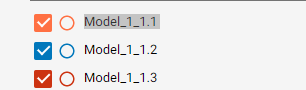

In [6]:
Image('Graphs/Model_1_1/Model_1_1_to_1_3.png')

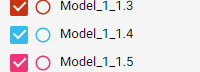

In [7]:
Image('Graphs/Model_1_1/Model_1_3_to_1_5.png')

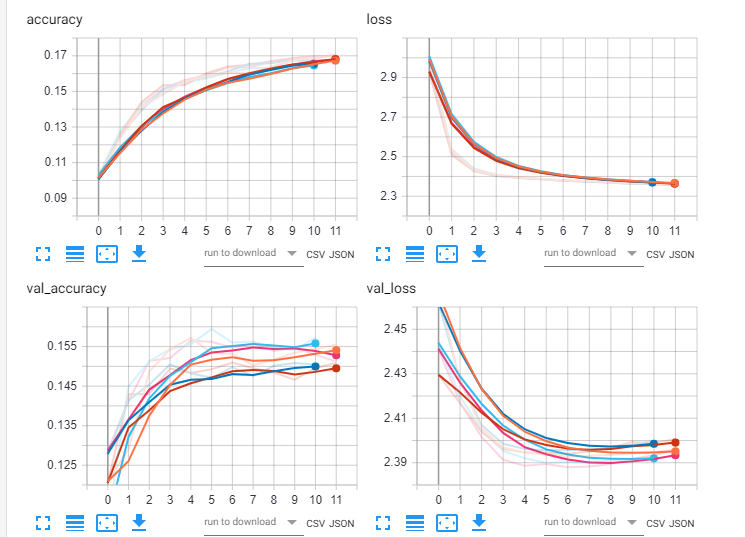

In [8]:
Image('Graphs/Model_1_1/Model_1_1_Scalars.png')

**Average Train Prediction**

In [196]:
train_pred_avg_1_1=np.zeros((train_1.shape[0],12))

In [197]:
for i in range(len(model_list_1)):
    train_pred=model_list_1[i].predict_proba(train_1)
    train_pred_avg_1_1+=train_pred
train_pred_avg_1_1/=len(model_list_1)

In [198]:
print("Train Average Log-Loss: ",log_loss(y_train_1, train_pred_avg_1_1))
no_events_nn_1_avg_train_predicted_classes=np.argmax(train_pred_avg_1_1, axis=1)


Train Average Log-Loss:  2.357487784240272


**Average CV Prediction**

In [199]:
cv_pred_avg_1_1=np.zeros((cv_1.shape[0],12))

In [200]:
for i in range(len(model_list_1)):
    cv_pred=model_list_1[i].predict_proba(cv_1)
    cv_pred_avg_1_1+=cv_pred
cv_pred_avg_1_1/=len(model_list_1)

In [201]:
print("CV Average Log-Loss: ",log_loss(y_cv_1, cv_pred_avg_1_1))
no_events_nn_1_avg_cv_predicted_classes=np.argmax(cv_pred_avg_1_1, axis=1)


CV Average Log-Loss:  2.355315665155766


**Observtion:**
Avearged Neural Network Model 1 has good Precision for Class F43+

**Average Test Predictions**

In [202]:
test_pred_avg_1_1=np.zeros((test_1.shape[0],12))

In [203]:
for i in range(len(model_list_1)):
    test_pred=model_list_1[i].predict_proba(test_1)
    test_pred_avg_1_1+=test_pred
test_pred_avg_1_1/=len(model_list_1)

**Saving Model Weights**

In [204]:
for i in range(len(model_list_1)):
    model_list_1[i].save('Saved_Models/No_Events/Neural_Network_1/Model_1_1_'+str(i+1)+'.h5')    

**Saving Test Prediction**

In [205]:
np.save('Models_Test_Predictions/nn_1_no_events_avg_test_prediction',test_pred_avg_1_1)

### 7.1.3.2. Neural Network 2

Model Architecture Refered From Competition Discussion: https://www.kaggle.com/c/talkingdata-mobile-user-demographics/discussion/23424

In [206]:
def create_model_1_2(input_dim,output_dim, learRate=0.0025):
    
    model = Sequential()
    model.add(Dense(500, input_shape=(input_dim,), init='uniform'))
    model.add(PReLU(init='zero'))
    model.add(Dropout(0.82))
    model.add(Dense(output_dim, init='uniform'))
    model.add(Activation('softmax'))
    opt = Adagrad(lr=learRate, epsilon=1e-08)
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    return model

In [207]:
model_1_2=create_model_1_2(train_1.shape[1],12)
model_1_2.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 500)               865500    
_________________________________________________________________
p_re_lu_23 (PReLU)           (None, 500)               500       
_________________________________________________________________
dropout_23 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 12)                6012      
_________________________________________________________________
activation_12 (Activation)   (None, 12)                0         
Total params: 872,012
Trainable params: 872,012
Non-trainable params: 0
_________________________________________________________________


In [208]:
y_train_nn_2=np_utils.to_categorical(y_train_1)
y_cv_nn_2=np_utils.to_categorical(y_cv_1)

In [209]:
logdir = os.path.join("logs/scalars","Model_1_2")
t_callback_1=TensorBoard(log_dir=logdir)

In [210]:
model_1_2.fit(train_1, y_train_nn_2, batch_size=350, epochs=30, verbose=1, validation_data=(cv_1, y_cv_nn_2),callbacks=[early_stop_1,t_callback_1])

Train on 63448 samples, validate on 11197 samples
Epoch 1/30
63448/63448 [==============================] - 14s 222us/step - loss: 2.4325 - accuracy: 0.1357 - val_loss: 2.4172 - val_accuracy: 0.1461
Epoch 2/30
63448/63448 [==============================] - 13s 209us/step - loss: 2.4160 - accuracy: 0.1415 - val_loss: 2.4109 - val_accuracy: 0.1464
Epoch 3/30
63448/63448 [==============================] - 15s 230us/step - loss: 2.4109 - accuracy: 0.1455 - val_loss: 2.4070 - val_accuracy: 0.1464
Epoch 4/30
63448/63448 [==============================] - 13s 206us/step - loss: 2.4065 - accuracy: 0.1455 - val_loss: 2.4042 - val_accuracy: 0.1476
Epoch 5/30
63448/63448 [==============================] - 13s 211us/step - loss: 2.4037 - accuracy: 0.1489 - val_loss: 2.4023 - val_accuracy: 0.1503
Epoch 6/30
63448/63448 [==============================] - 13s 206us/step - loss: 2.4018 - accuracy: 0.1473 - val_loss: 2.4007 - val_accuracy: 0.1537
Epoch 7/30
63448/63448 [==============================] 

**TensorBoard Plots**

In [ ]:
%load_ext tensorboard.notebook
#%tensorboard --logdir="C:\Users\tyerubandhi\Desktop\ML\Desktop_folder\Python_ML\SelfCaseStudy_1\Today_11_04\Talking_Data_User_Demographics-master\logs\scalars"
%tensorboard --logdir="C:\Users\tyerubandhi\Desktop\ML\Desktop_folder\Python_ML\SelfCaseStudy_1\Today_11_04\Talking_Data_User_Demographics-master\logs\scalars\Model_1_2"

**Train Accuracy**

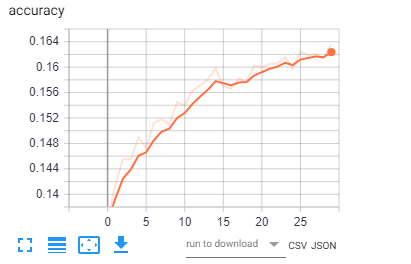

In [214]:
Image('Graphs/Model_1_2/Train_accuracy.png')

**Train Loss**

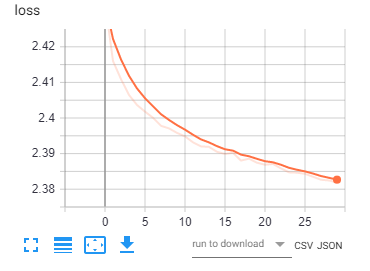

In [215]:
Image('Graphs/Model_1_2/Train_Loss.png')

**Validation Accuracy**

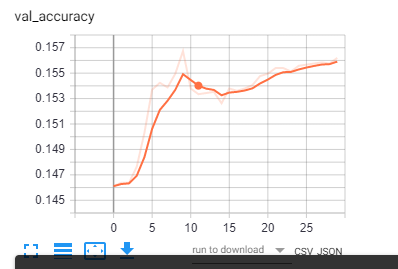

In [217]:
Image('Graphs/Model_1_2/Val_Accuracy.png')

**Validation Loss**

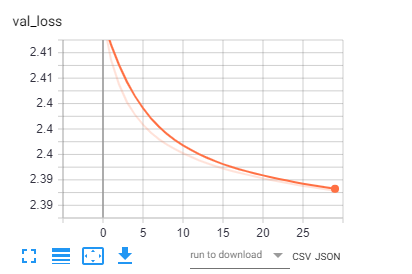

In [218]:
Image('Graphs/Model_1_2/Val_Loss.png')

**Train Prediction**

In [219]:
train_pred_1_2=model_1_2.predict_proba(train_1)
print("Train Log-Loss: ",log_loss(y_train_1, train_pred_1_2))
no_events_nn_2_train_predicted_classes=np.argmax(train_pred_1_2, axis=1)


Train Log-Loss:  2.3756901601940306


**CV Prediction**

In [220]:
cv_pred_1_2=model_1_2.predict_proba(cv_1)
print("CV Log-Loss: ",log_loss(y_cv_1, cv_pred_1_2))
no_events_nn_2_cv_predicted_classes=np.argmax(cv_pred_1_2, axis=1)


CV Log-Loss:  2.3903090020764286


**Test Prediction**

In [221]:
test_pred_1_2=model_1_2.predict_proba(test_1)

**Saving Model**

In [222]:
model_1_2.save('Saved_Models/No_Events/Model_1_2.h5')

**Saving Test Prediction**

In [223]:
np.save('Models_Test_Predictions/nn_2_no_events_test_prediction',test_pred_1_2)

### 7.2. Devices with Events

**Train, CV Split**

In [224]:
y_data_events=events_train_data['Class'].values

In [225]:
train_2, cv_2, y_train_2, y_cv_2 = train_test_split(X_train_events_one_hot_1, y_data_events,stratify=y_data_events,test_size=0.2,random_state=9)
test_2=X_test_events_one_hot_1

In [226]:
y_train_nn_3=np_utils.to_categorical(y_train_2)
y_cv_nn_3=np_utils.to_categorical(y_cv_2)

### 7.2.1. Neural Networks

**Approach**
1. Train 2 Neural Architectures on Events Feature Matrix
2. Train Each Model for 20 Runs and take avarage of predictions

### 7.2.1.1. Neural Network 1

Network Architecture Refered from: https://www.kaggle.com/c/talkingdata-mobile-user-demographics/discussion/23424

The Dropout in the input Layer adds value and variability for predictions and is helpful for taking avaerage of predictions

In [227]:
def model_2_1(input_dim,output_dim):
    model = Sequential()
    model.add(Dropout(0.15, input_shape=(input_dim,)))
    model.add(Dense(240, init='uniform'))
    model.add(PReLU(init='zero'))
    model.add(Dropout(0.8))
    model.add(Dense(240, init='uniform'))
    model.add(PReLU(init='zero', weights=None))
    model.add(Dropout(0.35))
    model.add(Dense(260, init='uniform'))
    model.add(PReLU(init='zero', weights=None))
    model.add(Dropout(0.40))
    model.add(Dense(output_dim, init='uniform'))
    model.add(Activation('softmax'))

    opt = Adagrad(lr=0.008, epsilon=1e-08)
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    return model

In [228]:
model_2_1_arch=model_2_1(X_train_events_one_hot_1.shape[1],12)
model_2_1_arch.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_24 (Dropout)         (None, 21566)             0         
_________________________________________________________________
dense_36 (Dense)             (None, 240)               5176080   
_________________________________________________________________
p_re_lu_24 (PReLU)           (None, 240)               240       
_________________________________________________________________
dropout_25 (Dropout)         (None, 240)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 240)               57840     
_________________________________________________________________
p_re_lu_25 (PReLU)           (None, 240)               240       
_________________________________________________________________
dropout_26 (Dropout)         (None, 240)             

The Function Takes number of models as input, and trains the required number of models, plots scalar graph for each model in Tensor Board, prints the avg cv loss of all the models, stores the model in a list and returns it

In [232]:
def get_network_2_1_models(n_models):
    """
    Takes number of models,  Trains Neural Network 1 for n_model times,
    stores the models in a list and returns the models
    """
    model_list_2=[]
    avg_cv_loss=0
    for i in range(n_models):
        model=model_2_1(train_2.shape[1],12)
        logdir = os.path.join("logs\scalars","Model_2_1."+str(i+1))
        t_callback=TensorBoard(log_dir=logdir)
        model.fit(train_2, y_train_nn_3, batch_size=149, epochs=20, verbose=1, validation_data=(cv_2, y_cv_nn_3),callbacks=[early_stop_1,t_callback])
        model_cv_prediction=model.predict_proba(cv_2)
        cv_loss=log_loss(y_cv_2, model_cv_prediction)
        print("CV Log Loss of Best Weights Model in Current Run: ",cv_loss)
        model_list_2.append(model)
        avg_cv_loss+=cv_loss
    avg_cv_loss/=n_models
    print("Average CV Loss of "+str(n_models)+" Runs :",avg_cv_loss)
    return model_list_2

In [230]:
model_list_2=get_network_2_1_models(20)

Train on 18647 samples, validate on 4662 samples
Epoch 1/20
18647/18647 [==============================] - 35s 2ms/step - loss: 2.3127 - accuracy: 0.1741 - val_loss: 2.1418 - val_accuracy: 0.2651
Epoch 2/20
18647/18647 [==============================] - 37s 2ms/step - loss: 2.1409 - accuracy: 0.2382 - val_loss: 2.0640 - val_accuracy: 0.3007
Epoch 3/20
18647/18647 [==============================] - 31s 2ms/step - loss: 2.0695 - accuracy: 0.2636 - val_loss: 2.0057 - val_accuracy: 0.3037
Epoch 4/20
18647/18647 [==============================] - 30s 2ms/step - loss: 2.0240 - accuracy: 0.2813 - val_loss: 1.9813 - val_accuracy: 0.3078
Epoch 5/20
18647/18647 [==============================] - 31s 2ms/step - loss: 1.9957 - accuracy: 0.2902 - val_loss: 1.9642 - val_accuracy: 0.3179
Epoch 6/20
18647/18647 [==============================] - 31s 2ms/step - loss: 1.9722 - accuracy: 0.3032 - val_loss: 1.9560 - val_accuracy: 0.3166
Epoch 7/20
18647/18647 [==============================] - 33s 2ms/ste

18647/18647 [==============================] - 30s 2ms/step - loss: 1.8397 - accuracy: 0.3419 - val_loss: 1.9209 - val_accuracy: 0.3288
Epoch 14/20
18647/18647 [==============================] - 30s 2ms/step - loss: 1.8296 - accuracy: 0.3462 - val_loss: 1.9263 - val_accuracy: 0.3260
Epoch 15/20
18647/18647 [==============================] - 29s 2ms/step - loss: 1.8096 - accuracy: 0.3522 - val_loss: 1.9160 - val_accuracy: 0.3310
Epoch 16/20
18647/18647 [==============================] - 31s 2ms/step - loss: 1.7958 - accuracy: 0.3552 - val_loss: 1.9154 - val_accuracy: 0.3271
Epoch 17/20
18647/18647 [==============================] - 36s 2ms/step - loss: 1.7832 - accuracy: 0.3591 - val_loss: 1.9151 - val_accuracy: 0.3325
Epoch 18/20
18647/18647 [==============================] - 33s 2ms/step - loss: 1.7710 - accuracy: 0.3635 - val_loss: 1.9187 - val_accuracy: 0.3222
Epoch 19/20
18647/18647 [==============================] - 32s 2ms/step - loss: 1.7630 - accuracy: 0.3683 - val_loss: 1.9209

Epoch 20/20
18647/18647 [==============================] - 32s 2ms/step - loss: 1.7351 - accuracy: 0.3767 - val_loss: 1.9291 - val_accuracy: 0.3179
CV Log Loss of Best Weights Model in Current Run:  1.930879433591503
Train on 18647 samples, validate on 4662 samples
Epoch 1/20
18647/18647 [==============================] - 39s 2ms/step - loss: 2.2877 - accuracy: 0.1868 - val_loss: 2.1392 - val_accuracy: 0.2600
Epoch 2/20
18647/18647 [==============================] - 35s 2ms/step - loss: 2.1393 - accuracy: 0.2414 - val_loss: 2.0608 - val_accuracy: 0.2752
Epoch 3/20
18647/18647 [==============================] - 36s 2ms/step - loss: 2.0762 - accuracy: 0.2627 - val_loss: 2.0100 - val_accuracy: 0.2969
Epoch 4/20
18647/18647 [==============================] - 37s 2ms/step - loss: 2.0242 - accuracy: 0.2789 - val_loss: 1.9873 - val_accuracy: 0.3095
Epoch 5/20
18647/18647 [==============================] - 35s 2ms/step - loss: 1.9918 - accuracy: 0.2936 - val_loss: 1.9706 - val_accuracy: 0.3130

18647/18647 [==============================] - 31s 2ms/step - loss: 1.8538 - accuracy: 0.3318 - val_loss: 1.9213 - val_accuracy: 0.3290
Epoch 13/20
18647/18647 [==============================] - 32s 2ms/step - loss: 1.8369 - accuracy: 0.3408 - val_loss: 1.9292 - val_accuracy: 0.3207
Epoch 14/20
18647/18647 [==============================] - 33s 2ms/step - loss: 1.8248 - accuracy: 0.3447 - val_loss: 1.9188 - val_accuracy: 0.3282
Epoch 15/20
18647/18647 [==============================] - 35s 2ms/step - loss: 1.8085 - accuracy: 0.3515 - val_loss: 1.9169 - val_accuracy: 0.3269
Epoch 16/20
18647/18647 [==============================] - 40s 2ms/step - loss: 1.8039 - accuracy: 0.3568 - val_loss: 1.9161 - val_accuracy: 0.3278
Epoch 17/20
18647/18647 [==============================] - 43s 2ms/step - loss: 1.7766 - accuracy: 0.3647 - val_loss: 1.9192 - val_accuracy: 0.3299
Epoch 18/20
18647/18647 [==============================] - 40s 2ms/step - loss: 1.7604 - accuracy: 0.3664 - val_loss: 1.9224

**TensorBoard Plots**

In [ ]:
%load_ext tensorboard.notebook
#%tensorboard --logdir="C:\Users\tyerubandhi\Desktop\ML\Desktop_folder\Python_ML\SelfCaseStudy_1\Today_11_04\Talking_Data_User_Demographics-master\logs\scalars"
%tensorboard --logdir="C:\Users\tyerubandhi\Desktop\ML\Desktop_folder\Python_ML\SelfCaseStudy_1\Today_11_04\Talking_Data_User_Demographics-master\logs\scalars\Model_2_1"

As there are 20 Models, Showing Plots for 10 Models at a Time to have a better visualization of Plots

**Models 1-10 With Sample Values**

**Models 1-10 Train Accuracy**

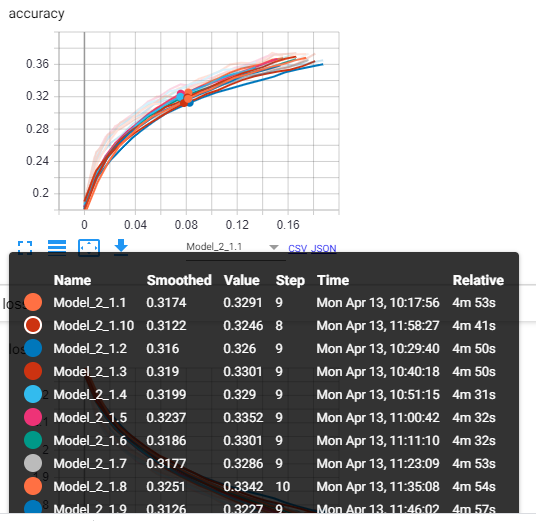

In [237]:
Image('Graphs/Model_2_1/Train_Accuracy_1_10.png')

**Models 1-10 Train Loss**

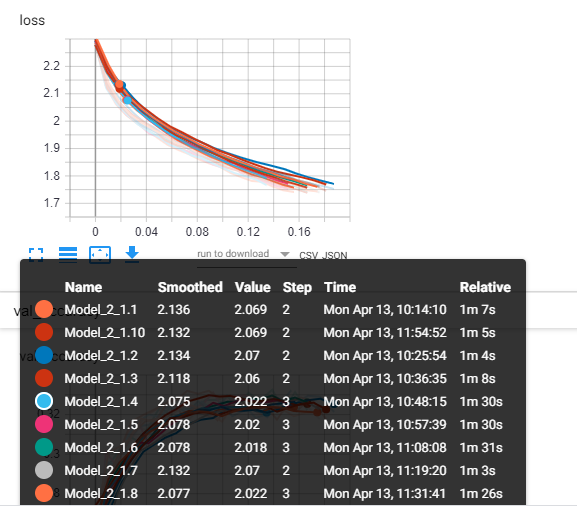

In [238]:
Image('Graphs/Model_2_1/Train_Loss_1_10.png')

**Models 1-10 Validation Accuracy**

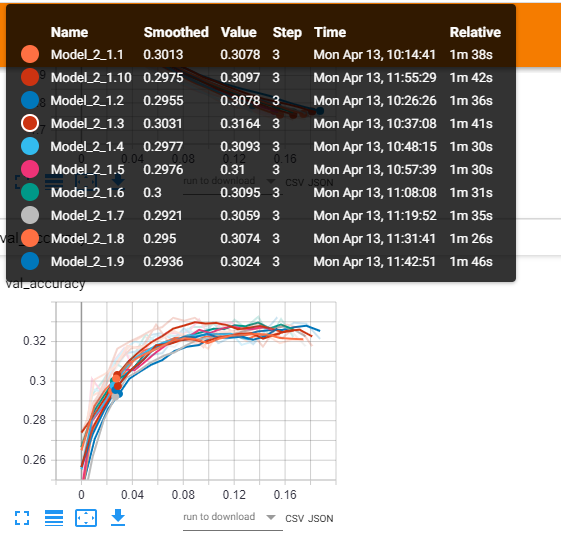

In [240]:
Image('Graphs/Model_2_1/Val_Accuracy_1_10.png')

**Models 1-10 Validation Loss**

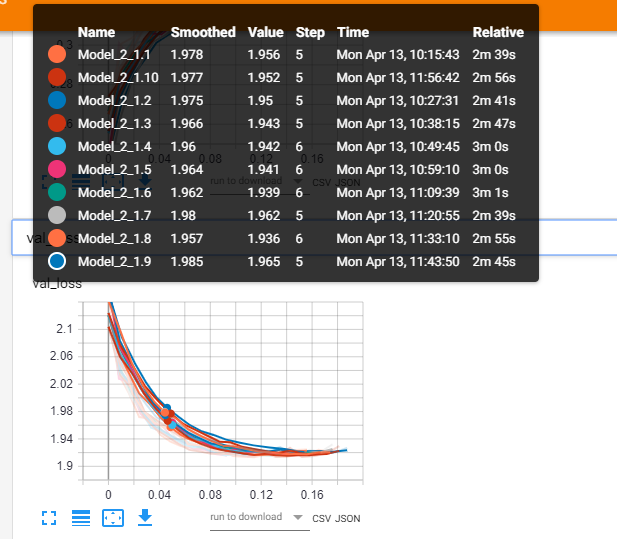

In [242]:
Image('Graphs/Model_2_1/Val_Loss_1_10.png')

**Models 11-20**

**Models 11-20 Train Accuracy**

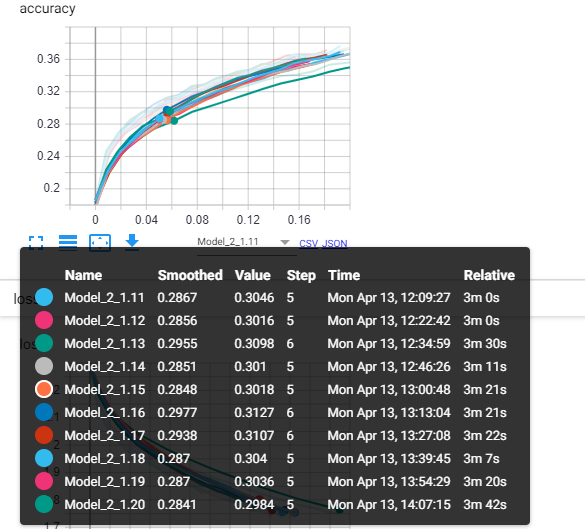

In [243]:
Image('Graphs/Model_2_1/Train_Accuracy_11_20.png')

**Models 11-20 Train Loss**

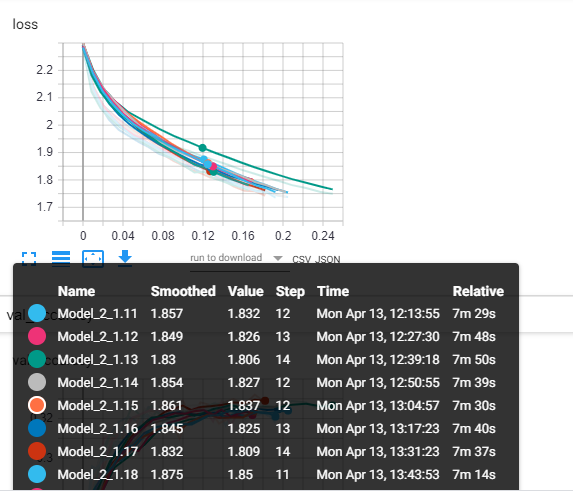

In [245]:
Image('Graphs/Model_2_1/Train_Loss_11_20.png')

**Models 11-20 Validation Accuracy**

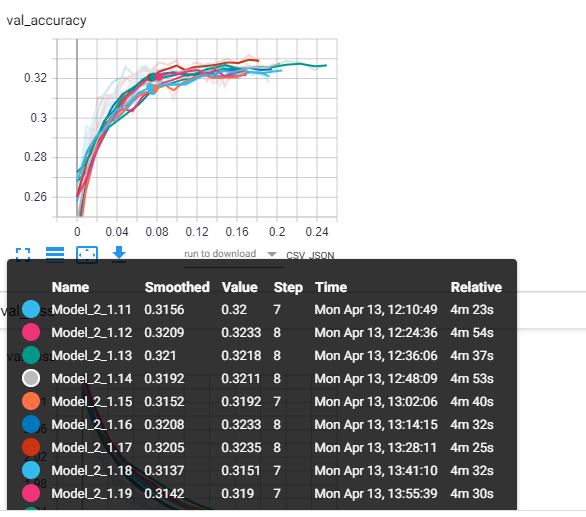

In [246]:
Image('Graphs/Model_2_1/Val_Accuracy_11_20.png')

**Models 11-20 Validation Loss**

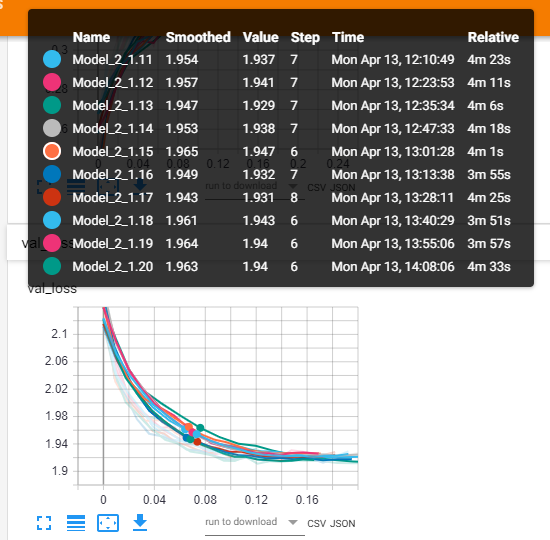

In [247]:
Image('Graphs/Model_2_1/Val_Loss_11_20.png')

**Average Train Prediction**

In [248]:
train_pred_avg_2_1=np.zeros((train_2.shape[0],12))

In [249]:
for i in range(len(model_list_2)):
    train_pred=model_list_2[i].predict_proba(train_2)
    train_pred_avg_2_1+=train_pred
train_pred_avg_2_1/=len(model_list_2)

In [250]:
print("Train Average Log-Loss: ",log_loss(y_train_2, train_pred_avg_2_1))
events_nn_1_avg_train_predicted_classes=np.argmax(train_pred_avg_2_1, axis=1)


Train Average Log-Loss:  1.569580729786375


**Average CV Prediction**

In [251]:
cv_pred_avg_2_1=np.zeros((cv_2.shape[0],12))

In [252]:
for i in range(len(model_list_2)):
    cv_pred=model_list_2[i].predict_proba(cv_2)
    cv_pred_avg_2_1+=cv_pred
cv_pred_avg_2_1/=len(model_list_2)

In [253]:
print("CV Average Log-Loss: ",log_loss(y_cv_2, cv_pred_avg_2_1))
events_nn_1_avg_cv_predicted_classes=np.argmax(cv_pred_avg_2_1, axis=1)


CV Average Log-Loss:  1.9054900690242889


**Average Test Predictions**

In [254]:
test_pred_avg_2_1=np.zeros((test_2.shape[0],12))

In [255]:
for i in range(len(model_list_2)):
    test_pred=model_list_2[i].predict_proba(test_2)
    test_pred_avg_2_1+=test_pred
test_pred_avg_2_1/=len(model_list_2)

**Saving Model Weights**

In [256]:
for i in range(len(model_list_2)):
    model_list_2[i].save('Saved_Models/Events/Neural_Network_1/Model_2_1_'+str(i+1)+'.h5')    

**Saving Test Prediction**

In [257]:
np.save('Models_Test_Predictions/nn_1_events_avg_test_prediction',test_pred_avg_2_1)

### 7.2.1.2. Neural Network 2

Network Architecture Refered from Competition 3rd Place Winner: https://github.com/chechir/talking_data

Even in this Network the Dropout in the input Layer adds value and variability for predictions and is helpful for taking avaerage of predictions

In [258]:
def model_2_2(input_dim,output_dim):
    model = Sequential()
    model.add(Dropout(0.4, input_shape=(input_dim,)))
    model.add(Dense(75))
    model.add(PReLU())
    model.add(Dropout(0.30))
    model.add(Dense(50, init='normal', activation='tanh'))
    model.add(PReLU())
    model.add(Dropout(0.20))
    model.add(Dense(output_dim, init='normal', activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])
    return model

In [259]:
model_2_2_arch=model_2_2(X_train_events_one_hot_1.shape[1],12)
model_2_2_arch.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_108 (Dropout)        (None, 21566)             0         
_________________________________________________________________
dense_120 (Dense)            (None, 75)                1617525   
_________________________________________________________________
p_re_lu_87 (PReLU)           (None, 75)                75        
_________________________________________________________________
dropout_109 (Dropout)        (None, 75)                0         
_________________________________________________________________
dense_121 (Dense)            (None, 50)                3800      
_________________________________________________________________
p_re_lu_88 (PReLU)           (None, 50)                50        
_________________________________________________________________
dropout_110 (Dropout)        (None, 50)              

The Function Takes number of models as input, and trains the required number of models, plots scalar graph for each model in Tensor Board, prints the avg cv loss of all the models, stores the model in a list and returns it

In [260]:
def get_network_2_2_models(n_models):
    """
    Takes number of models,  Trains Neural Network 2 for n_model times,
    stores the models in a list and returns the models
    """
    model_list_3=[]
    avg_cv_loss=0
    for i in range(n_models):
        model=model_2_2(train_2.shape[1],12)
        logdir = os.path.join("logs\scalars","Model_2_2."+str(i+1))
        t_callback=TensorBoard(log_dir=logdir)
        model.fit(train_2, y_train_nn_3, batch_size=149, epochs=20, verbose=1, validation_data=(cv_2, y_cv_nn_3),callbacks=[early_stop_1,t_callback])
        model_cv_prediction=model.predict_proba(cv_2)
        cv_loss=log_loss(y_cv_2, model_cv_prediction)
        print("CV Log Loss of Best Weights Model in Current Run: ",cv_loss)
        model_list_3.append(model)
        avg_cv_loss+=cv_loss
    avg_cv_loss/=n_models
    print("Average CV Loss of "+str(n_models)+" Runs :",avg_cv_loss)
    return model_list_3

In [261]:
model_list_3=get_network_2_2_models(20)

Train on 18647 samples, validate on 4662 samples
Epoch 1/20
18647/18647 [==============================] - 32s 2ms/step - loss: 2.3345 - accuracy: 0.1668 - val_loss: 2.2084 - val_accuracy: 0.2252
Epoch 2/20
18647/18647 [==============================] - 28s 1ms/step - loss: 2.1612 - accuracy: 0.2366 - val_loss: 2.1571 - val_accuracy: 0.2432
Epoch 3/20
18647/18647 [==============================] - 25s 1ms/step - loss: 2.0894 - accuracy: 0.2644 - val_loss: 2.0878 - val_accuracy: 0.2681
Epoch 4/20
18647/18647 [==============================] - 25s 1ms/step - loss: 2.0419 - accuracy: 0.2822 - val_loss: 2.0208 - val_accuracy: 0.2990
Epoch 5/20
18647/18647 [==============================] - 25s 1ms/step - loss: 2.0174 - accuracy: 0.2897 - val_loss: 1.9627 - val_accuracy: 0.3136
Epoch 6/20
18647/18647 [==============================] - 25s 1ms/step - loss: 1.9915 - accuracy: 0.2986 - val_loss: 1.9644 - val_accuracy: 0.3172
Epoch 7/20
18647/18647 [==============================] - 31s 2ms/ste

18647/18647 [==============================] - 24s 1ms/step - loss: 1.9147 - accuracy: 0.3212 - val_loss: 1.9339 - val_accuracy: 0.3220
Epoch 12/20
18647/18647 [==============================] - 26s 1ms/step - loss: 1.8872 - accuracy: 0.3297 - val_loss: 1.9242 - val_accuracy: 0.3284
Epoch 13/20
18647/18647 [==============================] - 25s 1ms/step - loss: 1.8738 - accuracy: 0.3322 - val_loss: 1.9374 - val_accuracy: 0.3160
Epoch 14/20
18647/18647 [==============================] - 24s 1ms/step - loss: 1.8626 - accuracy: 0.3381 - val_loss: 1.9832 - val_accuracy: 0.3110
Epoch 15/20
18647/18647 [==============================] - 24s 1ms/step - loss: 1.8564 - accuracy: 0.3454 - val_loss: 1.9224 - val_accuracy: 0.3228
Epoch 16/20
18647/18647 [==============================] - 23s 1ms/step - loss: 1.8334 - accuracy: 0.3512 - val_loss: 1.9201 - val_accuracy: 0.3265
Epoch 17/20
18647/18647 [==============================] - 25s 1ms/step - loss: 1.8212 - accuracy: 0.3542 - val_loss: 1.9578

18647/18647 [==============================] - 25s 1ms/step - loss: 1.8749 - accuracy: 0.3398 - val_loss: 1.9322 - val_accuracy: 0.3175
Epoch 14/20
18647/18647 [==============================] - 24s 1ms/step - loss: 1.8713 - accuracy: 0.3421 - val_loss: 1.9286 - val_accuracy: 0.3237
Epoch 15/20
18647/18647 [==============================] - 25s 1ms/step - loss: 1.8517 - accuracy: 0.3468 - val_loss: 1.9324 - val_accuracy: 0.3305
Epoch 16/20
18647/18647 [==============================] - 25s 1ms/step - loss: 1.8386 - accuracy: 0.3506 - val_loss: 1.9330 - val_accuracy: 0.3260
CV Log Loss of Best Weights Model in Current Run:  1.9237930726520445
Train on 18647 samples, validate on 4662 samples
Epoch 1/20
18647/18647 [==============================] - 32s 2ms/step - loss: 2.3191 - accuracy: 0.1784 - val_loss: 2.1604 - val_accuracy: 0.2383
Epoch 2/20
18647/18647 [==============================] - 25s 1ms/step - loss: 2.1544 - accuracy: 0.2427 - val_loss: 2.0644 - val_accuracy: 0.2827
Epoch 3

CV Log Loss of Best Weights Model in Current Run:  1.921131425523185
Train on 18647 samples, validate on 4662 samples
Epoch 1/20
18647/18647 [==============================] - 26s 1ms/step - loss: 2.3207 - accuracy: 0.1793 - val_loss: 2.1443 - val_accuracy: 0.2495
Epoch 2/20
18647/18647 [==============================] - 23s 1ms/step - loss: 2.1514 - accuracy: 0.2388 - val_loss: 2.0940 - val_accuracy: 0.2673
Epoch 3/20
18647/18647 [==============================] - 24s 1ms/step - loss: 2.0825 - accuracy: 0.2671 - val_loss: 2.0106 - val_accuracy: 0.3097
Epoch 4/20
18647/18647 [==============================] - 23s 1ms/step - loss: 2.0420 - accuracy: 0.2795 - val_loss: 1.9926 - val_accuracy: 0.3029
Epoch 5/20
18647/18647 [==============================] - 24s 1ms/step - loss: 2.0146 - accuracy: 0.2900 - val_loss: 1.9588 - val_accuracy: 0.3278
Epoch 6/20
18647/18647 [==============================] - 23s 1ms/step - loss: 1.9924 - accuracy: 0.2943 - val_loss: 1.9562 - val_accuracy: 0.3147


**TensorBoard Plots**

In [ ]:
%load_ext tensorboard.notebook
#%tensorboard --logdir="C:\Users\tyerubandhi\Desktop\ML\Desktop_folder\Python_ML\SelfCaseStudy_1\Today_11_04\Talking_Data_User_Demographics-master\logs\scalars"
%tensorboard --logdir="C:\Users\tyerubandhi\Desktop\ML\Desktop_folder\Python_ML\SelfCaseStudy_1\Today_11_04\Talking_Data_User_Demographics-master\logs\scalars\Model_2_2"

**Models 1-10**

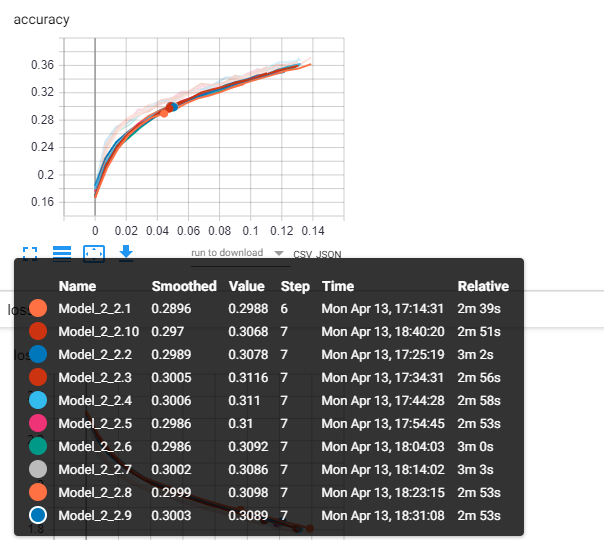

In [266]:
Image('Graphs/Model_2_2/Train_Accuracy_1_10.png')

**Models 1-10 Train Loss**

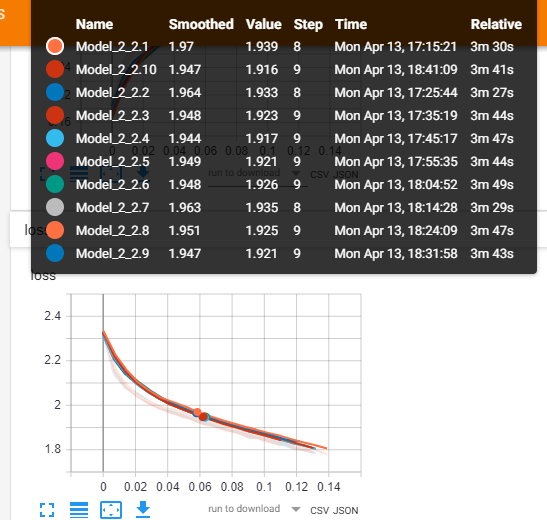

In [269]:
Image('Graphs/Model_2_2/Train_Loss_1_10.png')

**Models 1-10 Validation Accuracy**

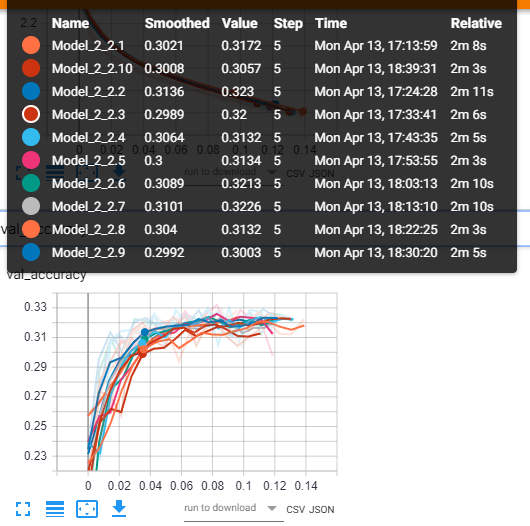

In [274]:
Image('Graphs/Model_2_2/Val_Accuracy_1_10.png')

**Models 1-10 Validation Loss**

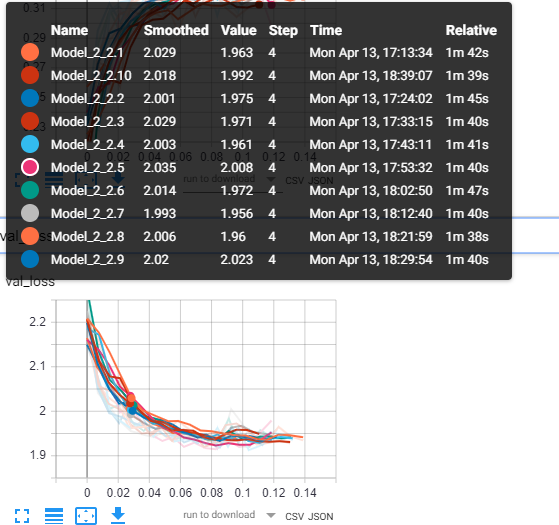

In [272]:
Image('Graphs/Model_2_2/Val_Loss_1_10.png')

**Models 11-20**

**Models 11-20 Train Accuracy**

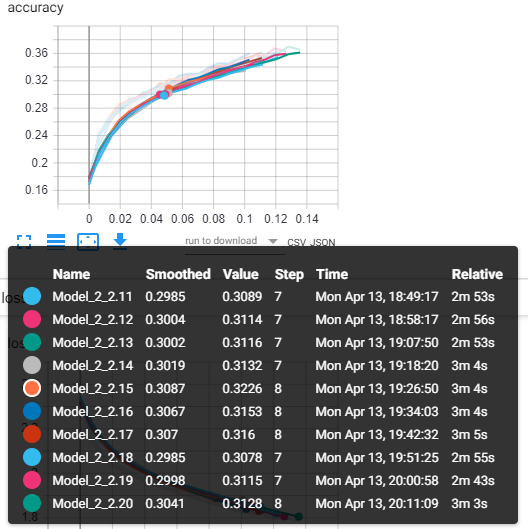

In [275]:
Image('Graphs/Model_2_2/Train_Accuracy_11_20.png')

**Models 11-20 Train Loss**

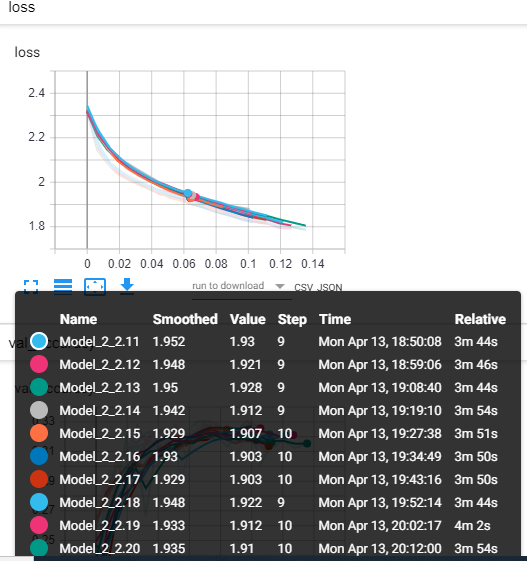

In [276]:
Image('Graphs/Model_2_2/Train_Loss_11_20.png')

**Models 11-20 Validation Accuracy**

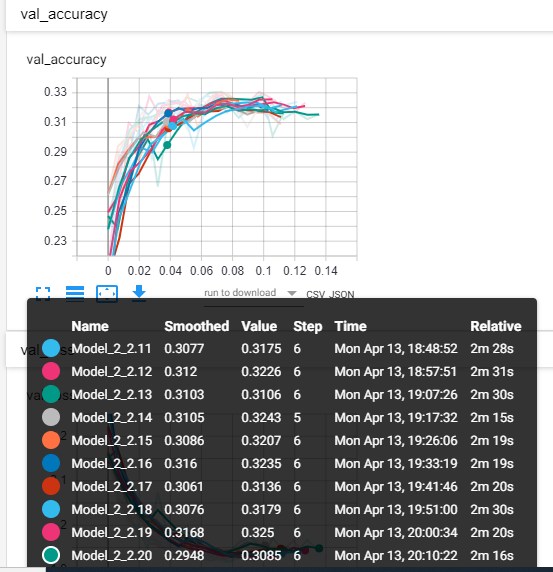

In [277]:
Image('Graphs/Model_2_2/Val_Accuracy_11_20.png')

**Models 11-20 Validation Loss**

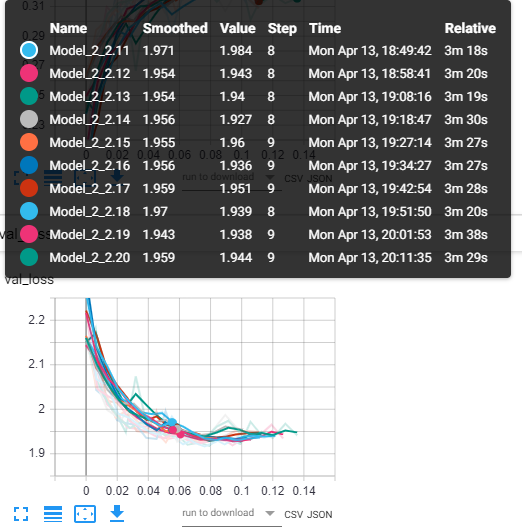

In [279]:
Image('Graphs/Model_2_2/Val_Loss_11_20.png')

**Average Train Prediction**

In [280]:
train_pred_avg_2_2=np.zeros((train_2.shape[0],12))

In [281]:
for i in range(len(model_list_3)):
    train_pred=model_list_3[i].predict_proba(train_2)
    train_pred_avg_2_2+=train_pred
train_pred_avg_2_2/=len(model_list_3)

In [282]:
print("Train Average Log-Loss: ",log_loss(y_train_2, train_pred_avg_2_2))
events_nn_2_avg_train_predicted_classes=np.argmax(train_pred_avg_2_2, axis=1)


Train Average Log-Loss:  1.6695620750790348


**Average CV Prediction**

In [283]:
cv_pred_avg_2_2=np.zeros((cv_2.shape[0],12))

In [284]:
for i in range(len(model_list_3)):
    cv_pred=model_list_3[i].predict_proba(cv_2)
    cv_pred_avg_2_2+=cv_pred
cv_pred_avg_2_2/=len(model_list_3)

In [285]:
print("CV Average Log-Loss: ",log_loss(y_cv_2, cv_pred_avg_2_2))
events_nn_2_avg_cv_predicted_classes=np.argmax(cv_pred_avg_2_2, axis=1)


CV Average Log-Loss:  1.9007500308256682


**Average Test Predictions**

In [286]:
test_pred_avg_2_2=np.zeros((test_2.shape[0],12))

In [287]:
for i in range(len(model_list_3)):
    test_pred=model_list_3[i].predict_proba(test_2)
    test_pred_avg_2_2+=test_pred
test_pred_avg_2_2/=len(model_list_3)

**Saving Model Weights**

In [288]:
for i in range(len(model_list_3)):
    model_list_3[i].save('Saved_Models/Events/Neural_Network_2/Model_2_2_'+str(i+1)+'.h5')    

**Saving Test Prediction**

In [289]:
np.save('Models_Test_Predictions/nn_2_events_avg_test_prediction',test_pred_avg_2_2)

### 7.3. Model Esembling

**Approach**
1. **Devices with No Events Data:** Take Weighted Average of Predictions of Predictions of 3 Models:
   * Logistic Regression (0.15)
   * No Events Neural Network 1 Avearge Predictions (0.75)
   * No Events Neural Network 2 Predictions (0.1)
2. **Devices with Events Data:** Take Weighted Avearge of Predictions of 2 Models:
   * Events Neural Network 1 Avearge Predictions (0.5)
   * Events Neural Network 2 Avearge Predictions (0.5)

**Assiging weights to Various models**

In [410]:
w1_1=0.15
w1_2=0.75
w1_3=0.1

In [411]:
w2_1=0.5
w2_2=0.5

#### 7.3.1. Train Data Ensemble Predictions

**No Events Devices Data**

In [412]:
train_prediction_1=(w1_1*lr_no_events_train_prediction)+(w1_2*train_pred_avg_1_1)+(w1_3*train_pred_1_2)

In [413]:
print("Train Log-Loss: ",log_loss(y_train_1, train_prediction_1))
ensembled_noevents_train_predicted_classes=np.argmax(train_prediction_1, axis=1)


Train Log-Loss:  2.3592485614721346


**Events Devices Data**

In [414]:
train_prediction_2=(w2_1*train_pred_avg_2_1)+(w2_2*train_pred_avg_2_2)

In [415]:
print("Train Log-Loss: ",log_loss(y_train_2, train_prediction_2))
ensembled_events_train_predicted_classes=np.argmax(train_prediction_2, axis=1)


Train Log-Loss:  1.6131739629625945


#### 7.3.2. CV Data Ensemble Predictions

**No Events Devices Data**

In [416]:
cv_prediction_1=(w1_1*lr_no_events_cv_prediction)+(w1_2*cv_pred_avg_1_1)+(w1_3*cv_pred_1_2)

In [417]:
print("CV Log-Loss: ",log_loss(y_cv_1, cv_prediction_1))
ensembled_noevents_cv_predicted_classes=np.argmax(cv_prediction_1, axis=1)


CV Log-Loss:  2.3626292101093678


**Observation** The Weighted Ensemble method for Devices with No Events Data has improved the Precision for F24-26, F43+ Classes

**Events Devices Data**

In [418]:
cv_prediction_2=(w2_1*cv_pred_avg_2_1)+(w2_2*cv_pred_avg_2_2)

In [419]:
print("CV Log-Loss: ",log_loss(y_cv_2, cv_prediction_2))
ensembled_events_cv_predicted_classes=np.argmax(cv_prediction_2, axis=1)


CV Log-Loss:  1.8945189236033273


**Observation**
The Weighted Average Model for Devices with Events has improved the Log-Loss to 1.893 which is less than each Neural Network Model Average CV Log-Loss

#### 7.3.3. Test Data Ensemble Predictions

**No Events Devices Data**

In [420]:
Test_Prediction_1=(w1_1*lr_no_events_test_prediction)+(w1_2*test_pred_avg_1_1)+(w1_3*test_pred_1_2)

**Events Devices Data**

In [421]:
Test_Prediction_2=(w2_1*test_pred_avg_2_1)+(w2_2*test_pred_avg_2_2)

**Combing Events and No Events Devices Data for Submission**

In [422]:
gatrain=pd.read_csv('gender_age_train.csv',index_col = 'device_id')

In [423]:
targetencoder = LabelEncoder().fit(gatrain.group)
y = targetencoder.transform(gatrain.group)
nclasses = len(targetencoder.classes_)

In [424]:
pred_1 = pd.DataFrame(Test_Prediction_1, index = noevents_test_data.index, columns=targetencoder.classes_)
pred_1.head()

,F23-,F24-26,F27-28,F29-32,F33-42,F43+,M22-,M23-26,M27-28,M29-31,M32-38,M39+
device_id,,,,,,,,,,,,
-5893464122623104785,0.041951,0.057156,0.043716,0.067235,0.062994,0.046982,0.080628,0.153986,0.092507,0.109296,0.141558,0.101991
-7560708697029818408,0.041951,0.057156,0.043716,0.067235,0.062994,0.046982,0.080628,0.153986,0.092507,0.109296,0.141558,0.101991
289797889702373958,0.057709,0.058022,0.046506,0.068385,0.082696,0.064892,0.090617,0.115479,0.071335,0.100095,0.128950,0.115312
-402874006399730161,0.057709,0.058022,0.046506,0.068385,0.082696,0.064892,0.090617,0.115479,0.071335,0.100095,0.128950,0.115312
5751283639860028129,0.052995,0.064885,0.045246,0.068813,0.084061,0.067575,0.073340,0.124023,0.074047,0.099251,0.140322,0.105441


In [425]:
pred_2 = pd.DataFrame(Test_Prediction_2, index = events_test_data.index, columns=targetencoder.classes_)
pred_2.head()

,F23-,F24-26,F27-28,F29-32,F33-42,F43+,M22-,M23-26,M27-28,M29-31,M32-38,M39+
device_id,,,,,,,,,,,,
1002079943728939269,0.000488,0.001195,0.002381,0.008496,0.038685,0.055331,0.003373,0.023560,0.028703,0.091636,0.259280,0.486872
-1547860181818787117,0.003104,0.007556,0.012617,0.034572,0.092961,0.091328,0.007569,0.041521,0.049529,0.114422,0.251157,0.293663
7374582448058474277,0.017569,0.038032,0.050946,0.106871,0.154360,0.078193,0.015748,0.050854,0.060473,0.109694,0.195154,0.122107
-6220210354783429585,0.007293,0.010901,0.011955,0.019714,0.041619,0.060712,0.054360,0.139234,0.091779,0.150272,0.202381,0.209779
6873889408535437611,0.005100,0.014326,0.019141,0.036354,0.044294,0.035408,0.018201,0.106202,0.114880,0.200461,0.250819,0.154814


In [426]:
final_pred=pd.concat([pred_1,pred_2], axis=0)

In [427]:
final_pred.head()

,F23-,F24-26,F27-28,F29-32,F33-42,F43+,M22-,M23-26,M27-28,M29-31,M32-38,M39+
device_id,,,,,,,,,,,,
-5893464122623104785,0.041951,0.057156,0.043716,0.067235,0.062994,0.046982,0.080628,0.153986,0.092507,0.109296,0.141558,0.101991
-7560708697029818408,0.041951,0.057156,0.043716,0.067235,0.062994,0.046982,0.080628,0.153986,0.092507,0.109296,0.141558,0.101991
289797889702373958,0.057709,0.058022,0.046506,0.068385,0.082696,0.064892,0.090617,0.115479,0.071335,0.100095,0.128950,0.115312
-402874006399730161,0.057709,0.058022,0.046506,0.068385,0.082696,0.064892,0.090617,0.115479,0.071335,0.100095,0.128950,0.115312
5751283639860028129,0.052995,0.064885,0.045246,0.068813,0.084061,0.067575,0.073340,0.124023,0.074047,0.099251,0.140322,0.105441


In [428]:
final_pred.shape

(112071, 12)

In [429]:
final_pred.to_csv('Submission_Final_1.csv',index=True)

## 8. Kaggle competition Results

Total Teams Participated in the Competition are 1688.

Rank Should be less than 168 to be in top 10%

**Kaggle Submission Score**

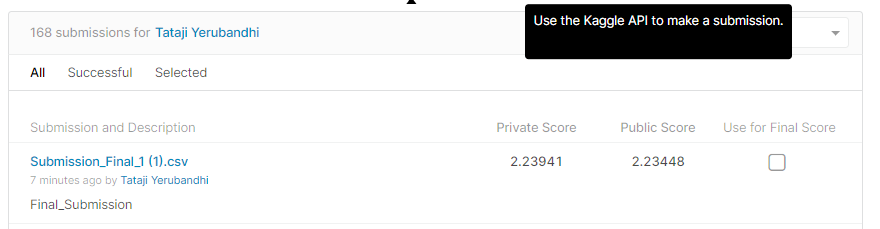

In [4]:
Image('Final_Kaggle_score.png')

**Top 10% Private LeaderBoard**

Submission Ranks 125th in Private Leader Board

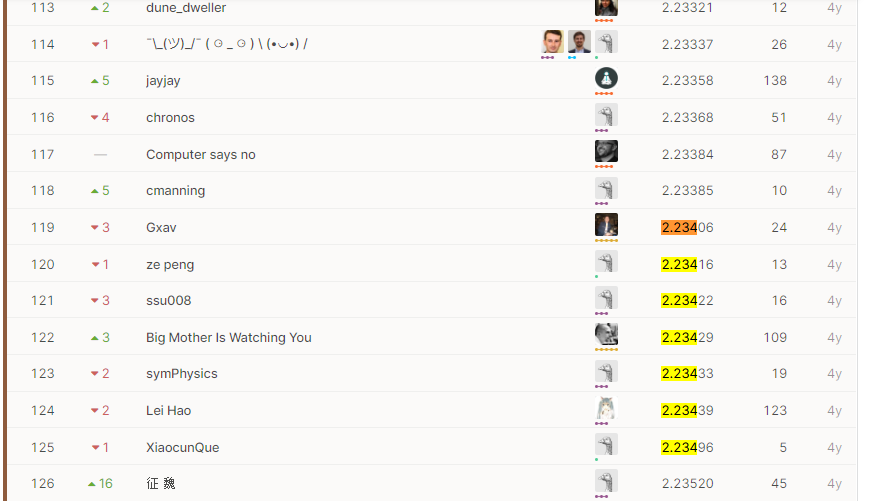

In [8]:
Image('Leaderboard_postion_private_125.png')

**Top 10% Public LeaderBoard**

Submission Ranks 150th in public Leader Board

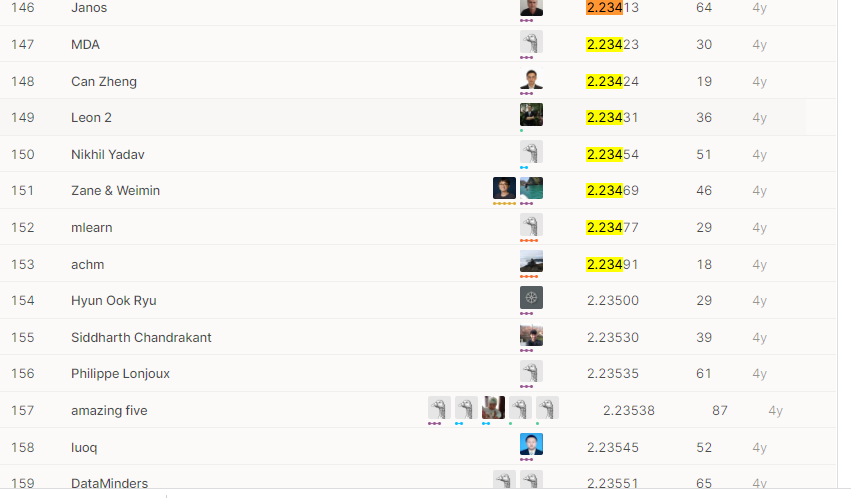

In [9]:
Image('public_leader_board_150.png')

## 9. Results

In [17]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Model", " Cross validation Log-loss"]
x.add_row(["Logistic_Regression_No Events",  2.38])
x.add_row(["XG Boost_No Events",  2.39])
x.add_row(["Avg_NN_Model_1_1_No Events",  2.35])
x.add_row(["NN Model_1_2_No Events",  2.39])
x.add_row(["Avg NN Model_2_1_Events",  1.90])
x.add_row(["Avg NN Model_2_2_Events", 1.9])
x.add_row(["Ensembled_Model_No_Events", 2.36])
x.add_row(["Ensembled_Model_Events", 1.89])

print(x)            

+-------------------------------+----------------------------+
|             Model             |  Cross validation Log-loss |
+-------------------------------+----------------------------+
| Logistic_Regression_No Events |            2.38            |
|       XG Boost_No Events      |            2.39            |
|   Avg_NN_Model_1_1_No Events  |            2.35            |
|     NN Model_1_2_No Events    |            2.39            |
|    Avg NN Model_2_1_Events    |            1.9             |
|    Avg NN Model_2_2_Events    |            1.9             |
|   Ensembled_Model_No_Events   |            2.36            |
|     Ensembled_Model_Events    |            1.89            |
+-------------------------------+----------------------------+


## 10. Conclusion

1.Event Data plays a major role for better predictions but almost 70% of the data does not contains events
2.Logistic regression has given better performance compared to xgboost although Logistic regression is a simple model to predict.
3.Ensemble model with events has given the best performance(1.89)
4.Finally could able to stand in top 10% with logloss of 2.2344